In [ ]:
# install Hangul font

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_DI = pd.read_csv("/content/train_DI.csv")
train_IVF = pd.read_csv("/content/train_IVF.csv")
test_DI= pd.read_csv("/content/test_DI.csv")
test_IVF = pd.read_csv("/content/test_IVF.csv")


In [ ]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수"

]

numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수"

]

TARGET = '임신 성공 여부'

In [ ]:
# 선택할 컬럼 설정
used_columns = categorical_columns + numeric_columns

# 각 데이터셋에서 선택한 컬럼만 추출
train_DI_selected = train_DI[used_columns]
train_IVF_selected = train_IVF[used_columns]
test_DI_selected = test_DI[used_columns]
test_IVF_selected = test_IVF[used_columns]


In [ ]:
train_DI_selected

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,배아 생성 주요 이유,...,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,임신 시도 또는 마지막 임신 경과 연수
0,TRXQMD,만38-39세,DI,IUI,0,알 수 없음,NaN,NaN,NaN,NaN,...,3회,5회,5회,0회,0회,0회,0회,0회,0회,NaN
1,TRDQAZ,만18-34세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,3회,0회,3회,1회,0회,1회,1회,0회,1회,NaN
2,TRJXFG,만35-37세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,3회,0회,3회,0회,0회,0회,0회,0회,0회,NaN
3,TRXQMD,만38-39세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,3회,0회,3회,0회,0회,0회,0회,0회,0회,NaN
4,TRCMWS,만40-42세,DI,IUI,0,알 수 없음,NaN,NaN,NaN,NaN,...,1회,0회,1회,0회,0회,0회,0회,0회,0회,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,TRZKPL,만45-50세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,6회 이상,0회,6회 이상,1회,0회,1회,1회,0회,1회,NaN
6287,TRYBLT,만18-34세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,2회,0회,2회,0회,0회,0회,0회,0회,0회,NaN
6288,TRYBLT,만40-42세,DI,IUI,1,알 수 없음,NaN,NaN,NaN,NaN,...,2회,0회,2회,1회,0회,1회,0회,0회,0회,NaN
6289,TRCMWS,만40-42세,DI,IUI,0,알 수 없음,NaN,NaN,NaN,NaN,...,5회,0회,5회,1회,0회,1회,1회,0회,1회,NaN


In [ ]:
import pandas as pd

# 데이터 로드
train_IVF_path = "/content/train_IVF.csv"  # 업로드한 파일 경로
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# 데이터 크기 확인 (행, 열 개수)
print("📌 데이터 크기 (행, 열):", train_IVF.shape)

# 데이터 타입 및 기본 정보 확인
print("\n📌 데이터 타입 및 기본 정보:")
print(train_IVF.info())

# 상위 5개 데이터 확인
print("\n📌 상위 5개 데이터 미리보기:")
print(train_IVF.head())

# 데이터 기본 통계 정보 확인
print("\n📌 수치형 변수 기초 통계량:")
print(train_IVF.describe())


📌 데이터 크기 (행, 열): (250060, 69)

📌 데이터 타입 및 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250060 entries, 0 to 250059
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     250060 non-null  object 
 1   시술 시기 코드               250060 non-null  object 
 2   시술 당시 나이               250060 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9067 non-null    float64
 4   시술 유형                  250060 non-null  object 
 5   특정 시술 유형               250058 non-null  object 
 6   배란 자극 여부               250060 non-null  int64  
 7   배란 유도 유형               250060 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             250060 non-null  int64  
 12  남성 부 불임 원인             250060 non-null  int64  
 13  여성 주 불임 원인             250060 non-null  

결측치 확인


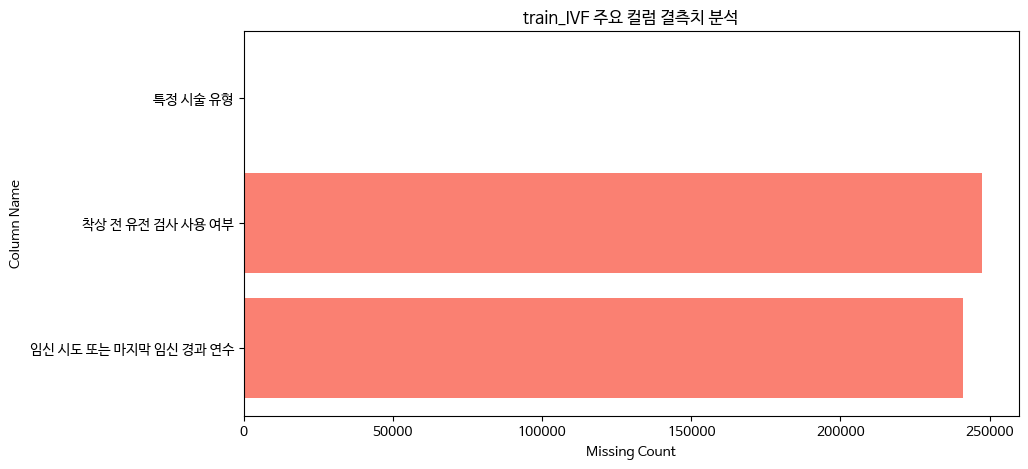

결측치 분석 결과:
                  Column  Missing_Count
0               특정 시술 유형              2
1       착상 전 유전 검사 사용 여부         247342
2  임신 시도 또는 마지막 임신 경과 연수         240993


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
train_IVF_path = "/content/train_IVF.csv"  # 업로드한 파일 경로
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# 분석 대상 컬럼
categorical_columns = [
    "시술 시기 코드", "시술 당시 나이", "시술 유형", "특정 시술 유형", "배란 자극 여부",
    "배란 유도 유형", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유", "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
    "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

numeric_columns = ["임신 시도 또는 마지막 임신 경과 연수"]
target_column = "임신 성공 여부"

# 대상 컬럼만 선택
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# 결측치 개수 계산
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing_Count': missing_values.values})

# 결측치 시각화
plt.figure(figsize=(10, 5))
plt.barh(missing_values_df["Column"], missing_values_df["Missing_Count"], color="salmon")
plt.xlabel("Missing Count")
plt.ylabel("Column Name")
plt.title("train_IVF 주요 컬럼 결측치 분석")
plt.gca().invert_yaxis()
plt.show()

# 결과 데이터 출력
print("결측치 분석 결과:")
print(missing_values_df)


In [ ]:
import pandas as pd

# 데이터 로드
train_IVF_path = "/content/train_IVF.csv"  # 업로드한 파일 경로
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# 분석 대상 컬럼
categorical_columns = [
    "시술 시기 코드", "시술 당시 나이", "시술 유형", "특정 시술 유형", "배란 자극 여부",
    "배란 유도 유형", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유", "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
    "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

numeric_columns = ["임신 시도 또는 마지막 임신 경과 연수"]
target_column = "임신 성공 여부"

# 대상 컬럼만 선택
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# 결측치 개수 계산
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]

# 결측치 분석 결과 출력
if missing_values.empty:
    print("결측치가 없습니다.")
else:
    print("\n결측치 분석 결과:")
    print(missing_values.to_string(index=True))



결측치 분석 결과:
특정 시술 유형                      2
착상 전 유전 검사 사용 여부         247342
임신 시도 또는 마지막 임신 경과 연수    240993


In [ ]:
import pandas as pd

# 데이터 로드
train_IVF_path = "/content/train_DI.csv"  # 업로드한 파일 경로
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# 분석 대상 컬럼
categorical_columns = [
    "시술 시기 코드", "시술 당시 나이", "시술 유형", "특정 시술 유형", "배란 자극 여부",
    "배란 유도 유형", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부",
    "배아 생성 주요 이유", "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
    "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

numeric_columns = ["임신 시도 또는 마지막 임신 경과 연수"]
target_column = "임신 성공 여부"

# 대상 컬럼만 선택
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# 결측치 개수 계산
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]

# 결측치 분석 결과 출력
if missing_values.empty:
    print("결측치가 없습니다.")
else:
    print("\n결측치 분석 결과:")
    print(missing_values.to_string(index=True))



결측치 분석 결과:
단일 배아 이식 여부              6291
착상 전 유전 검사 사용 여부         6291
착상 전 유전 진단 사용 여부         6291
배아 생성 주요 이유              6291
임신 시도 또는 마지막 임신 경과 연수    5988


기본 통계랑 분석

In [ ]:
import pandas as pd

# 수치형 변수 기본 통계량 확인
print("\n📌 수치형 변수 기초 통계량:")
print(train_IVF_selected.describe())

# 범주형 변수의 값 분포 확인
print("\n📌 범주형 변수별 데이터 분포:")
for col in categorical_columns:
    print(f"\n▶ {col} 값 분포:")
    print(train_IVF_selected[col].value_counts())



📌 수치형 변수 기초 통계량:
          배란 자극 여부  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  \
count  6291.000000          0.0               0.0               0.0   
mean      0.522333          NaN               NaN               NaN   
std       0.499541          NaN               NaN               NaN   
min       0.000000          NaN               NaN               NaN   
25%       0.000000          NaN               NaN               NaN   
50%       1.000000          NaN               NaN               NaN   
75%       1.000000          NaN               NaN               NaN   
max       1.000000          NaN               NaN               NaN   

       배아 생성 주요 이유  임신 시도 또는 마지막 임신 경과 연수     임신 성공 여부  
count          0.0             303.000000  6291.000000  
mean           NaN               9.227723     0.128914  
std            NaN               3.561795     0.335132  
min            NaN               1.000000     0.000000  
25%            NaN               7.000000     0.000000  


### train_DI 데이터 시각화 ###


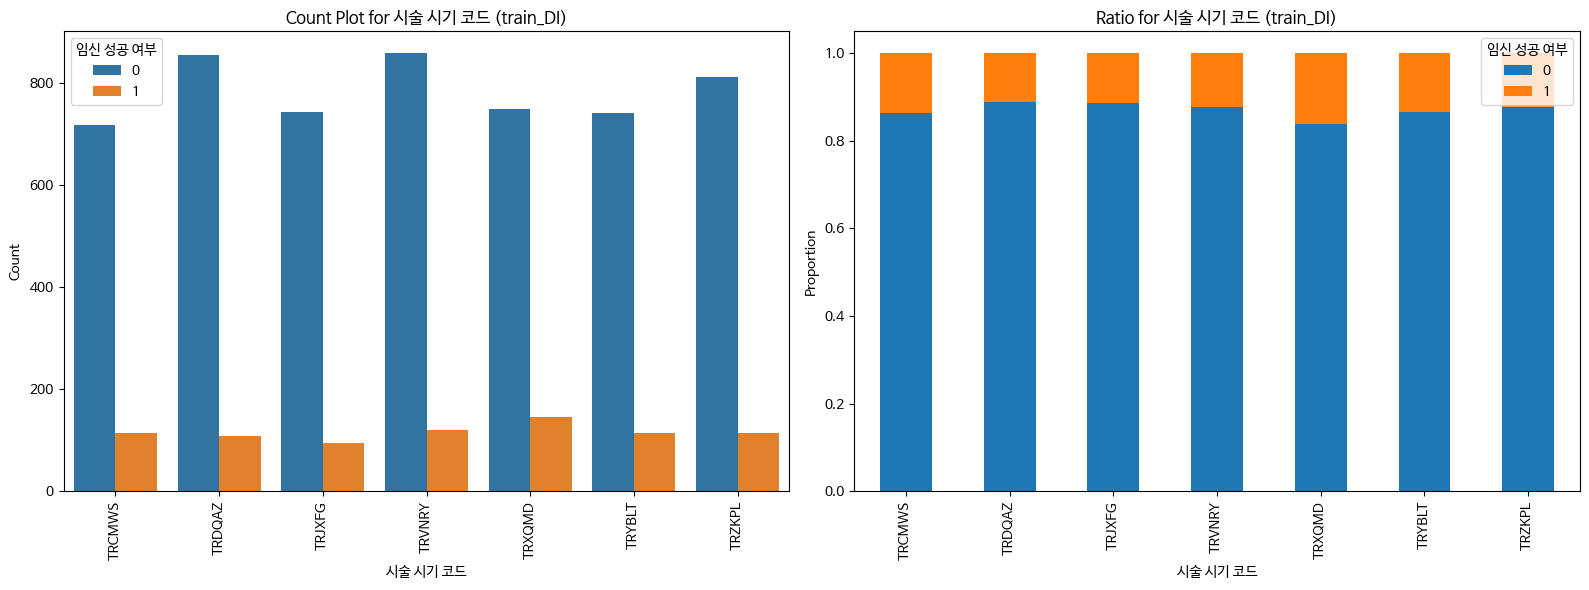

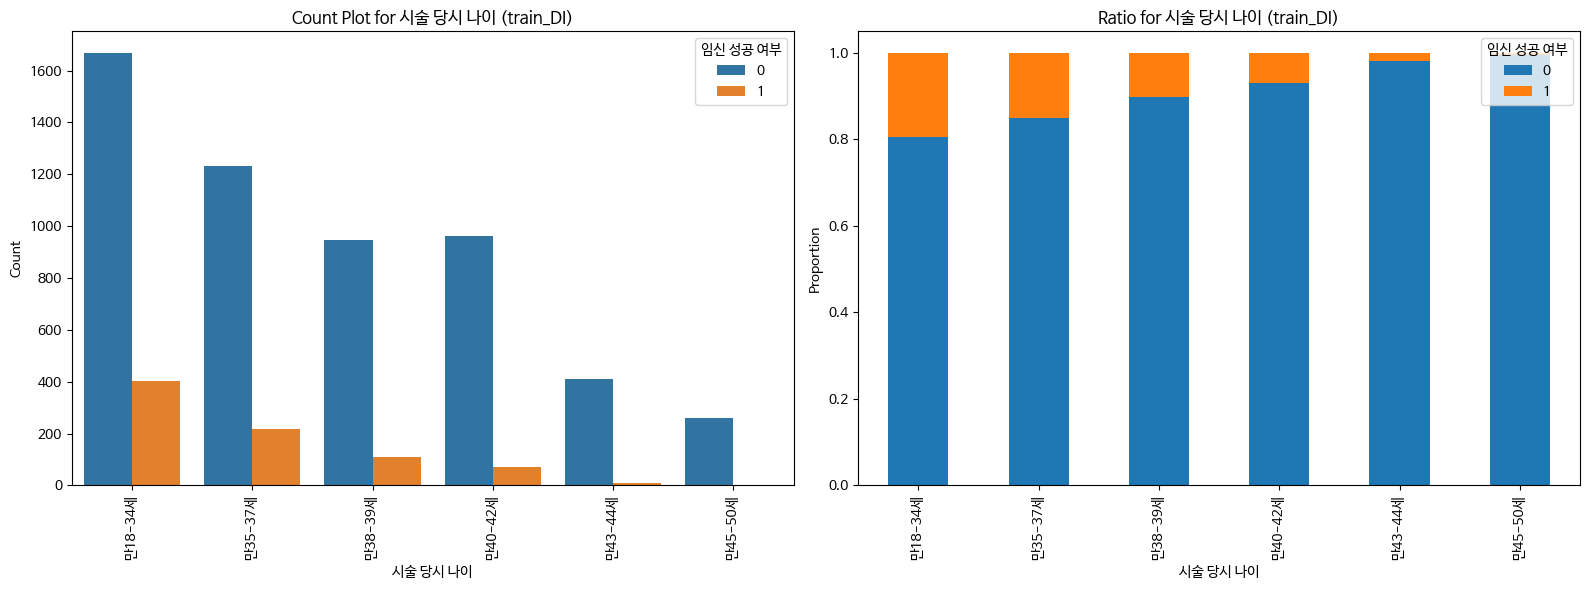

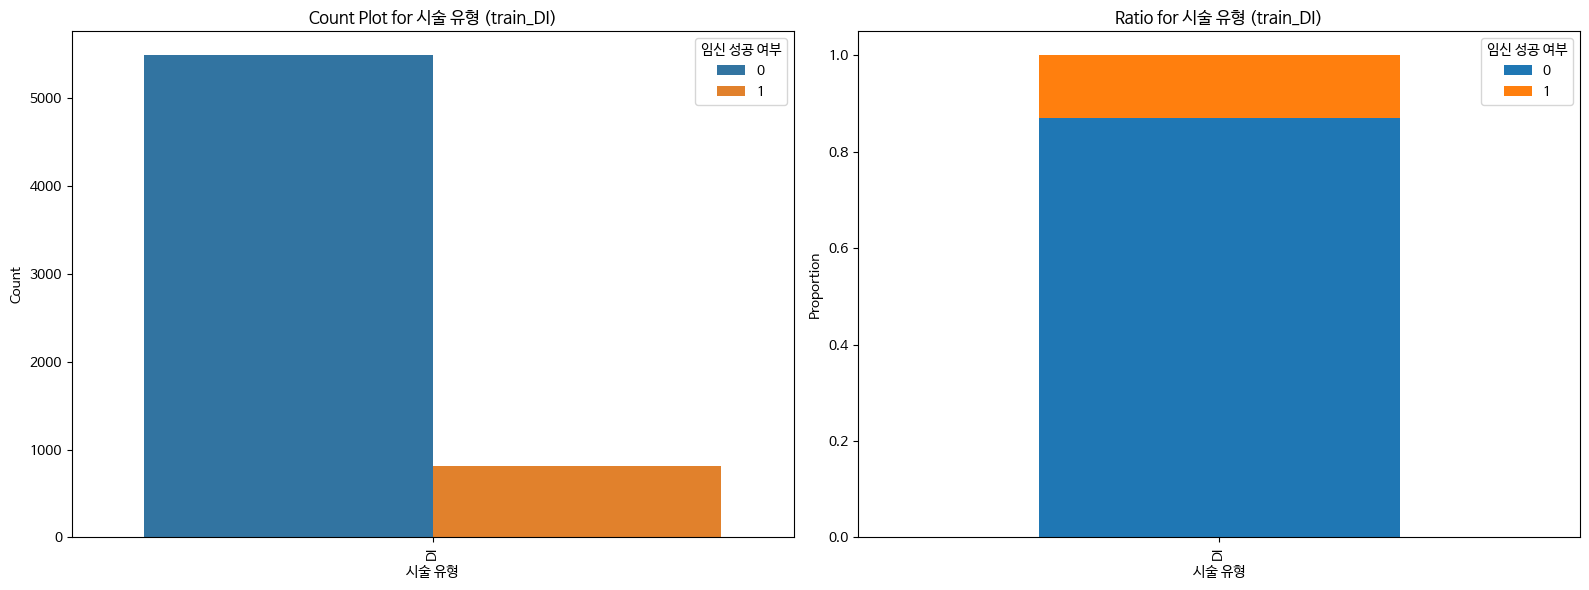

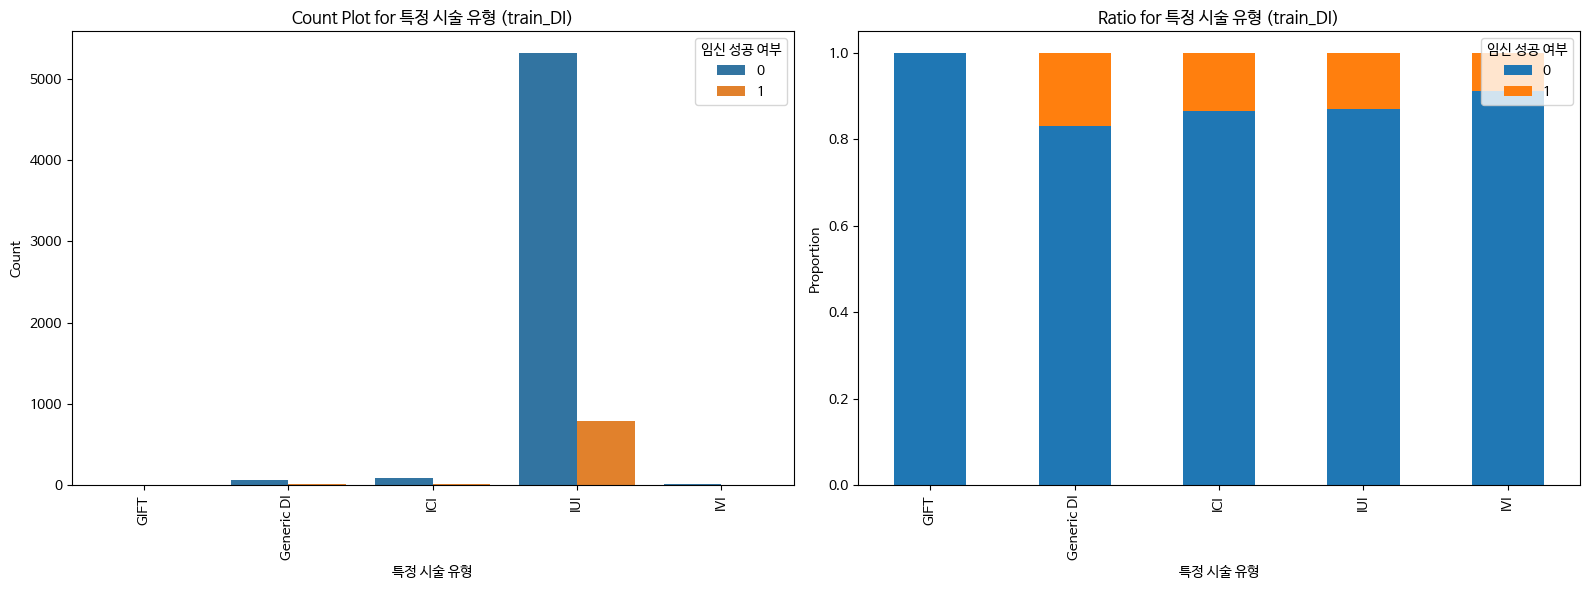

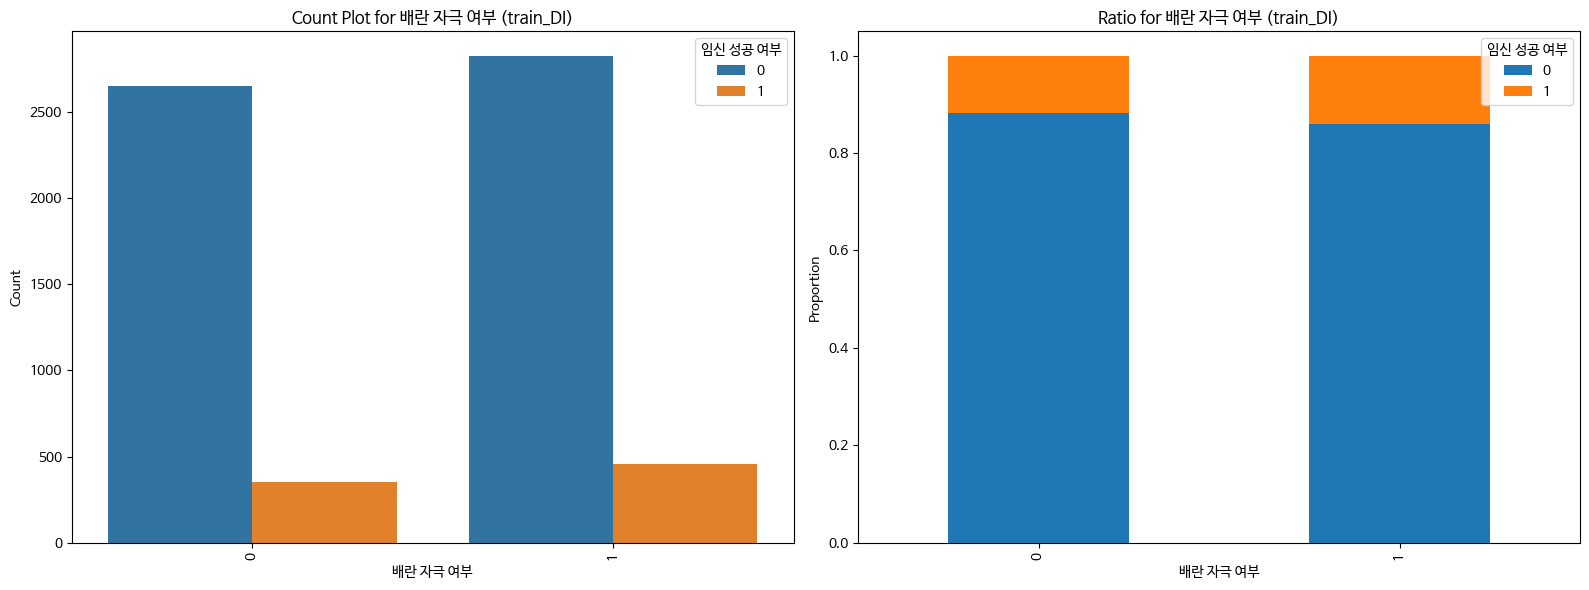

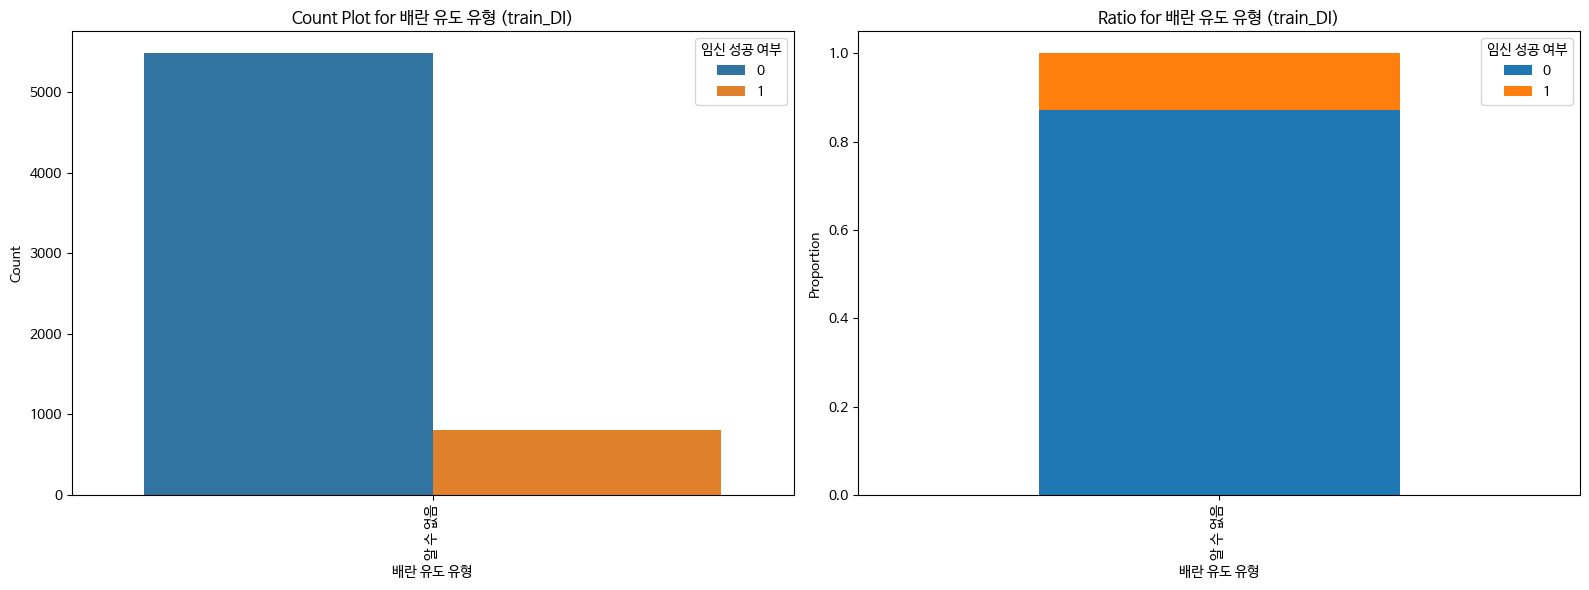

단일 배아 이식 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
착상 전 유전 검사 사용 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
착상 전 유전 진단 사용 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
배아 생성 주요 이유 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.


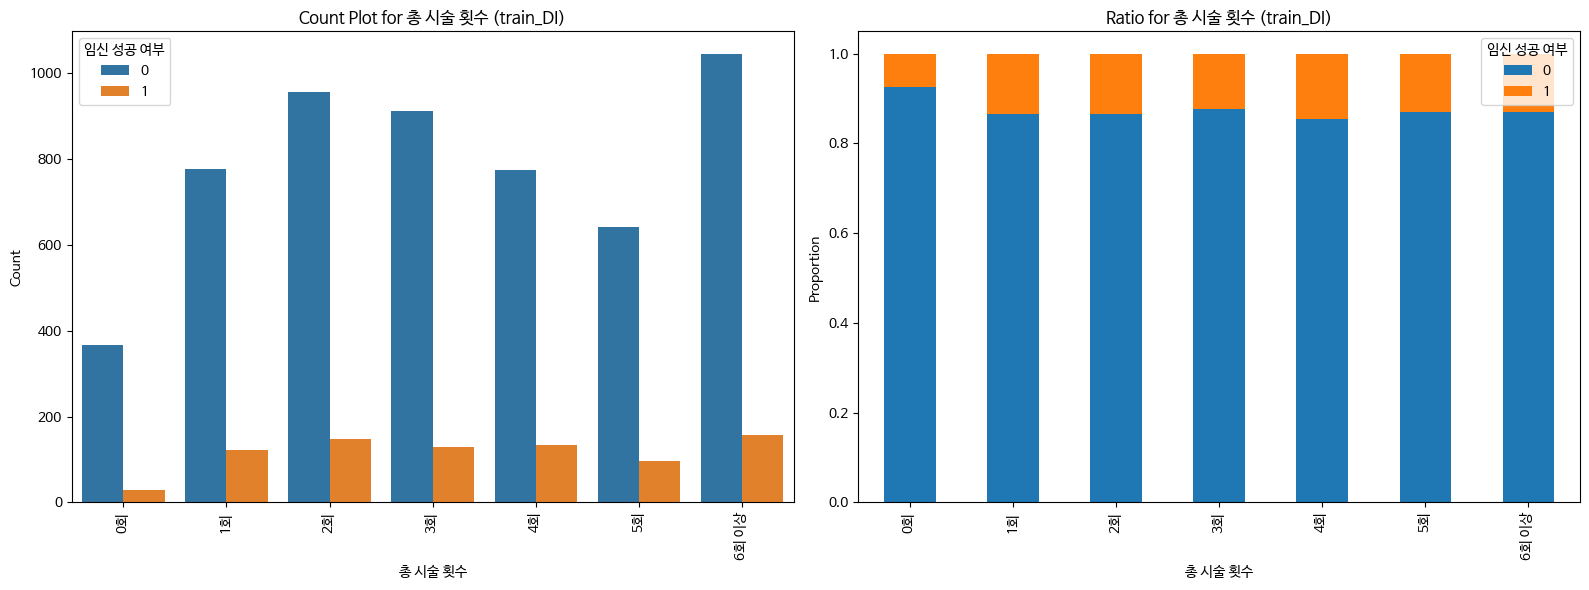

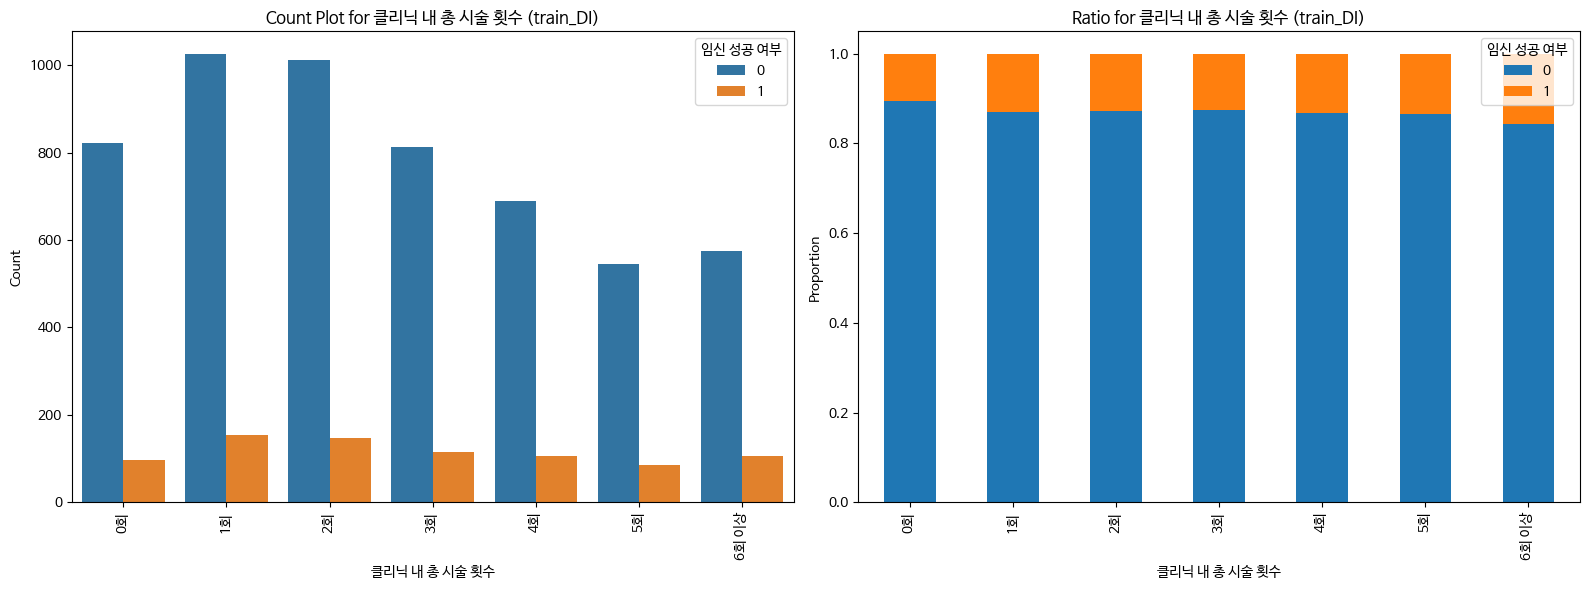

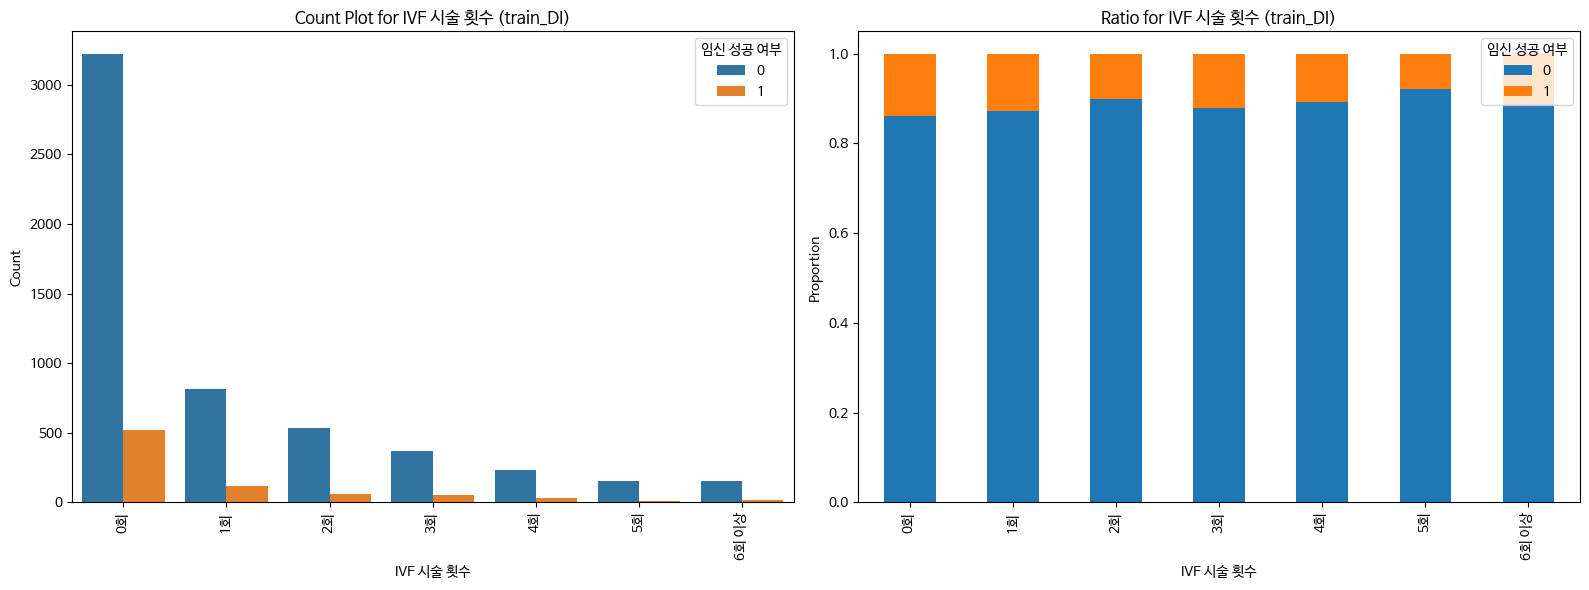

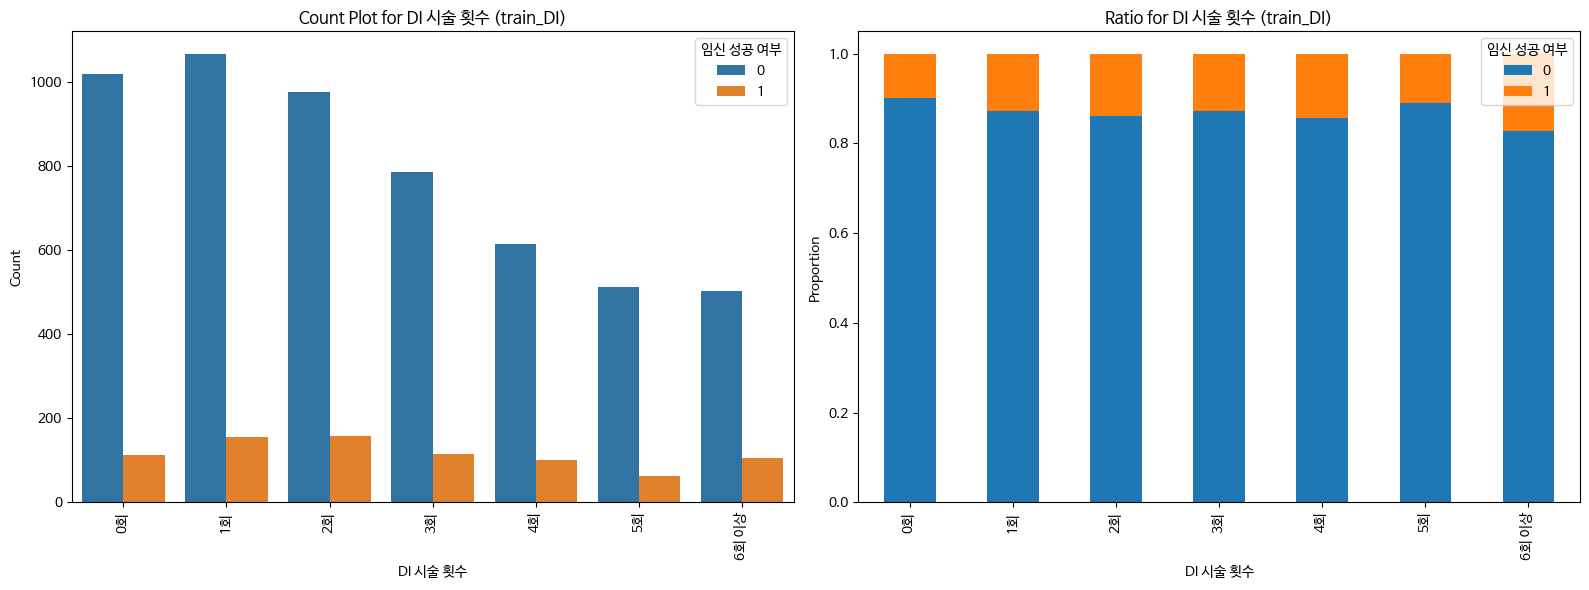

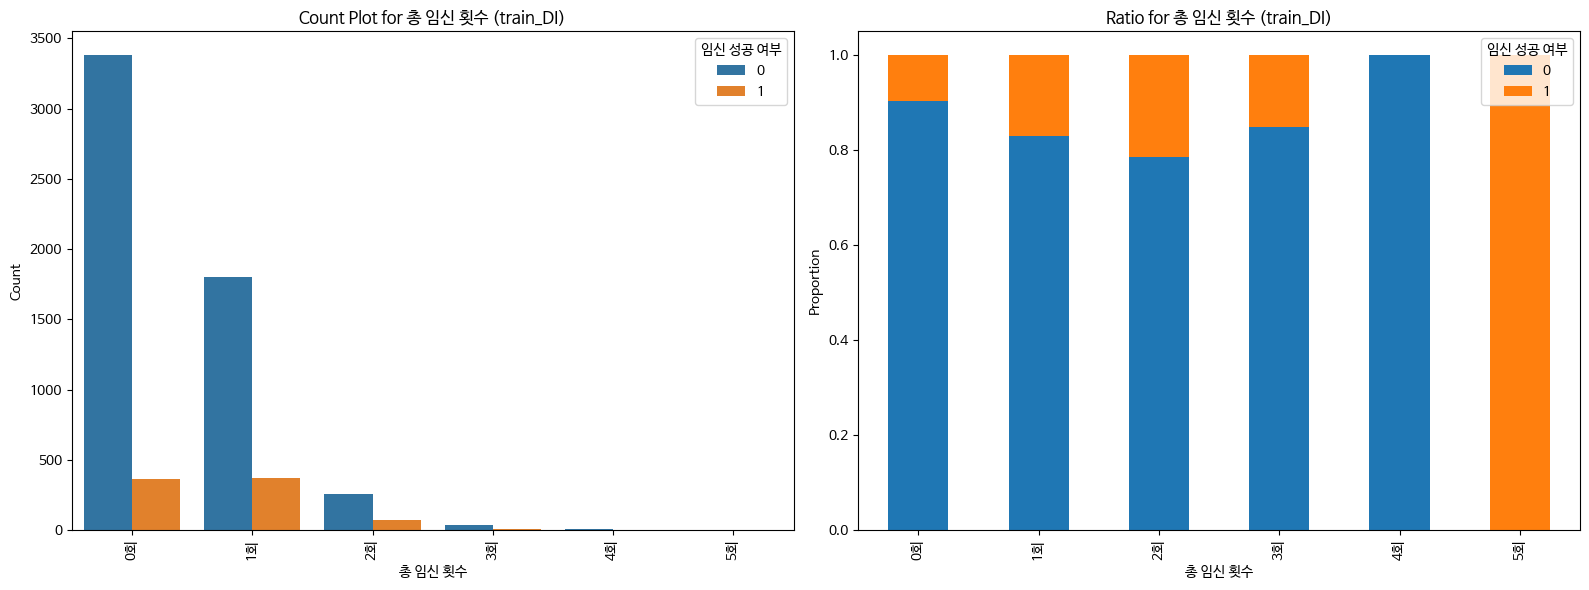

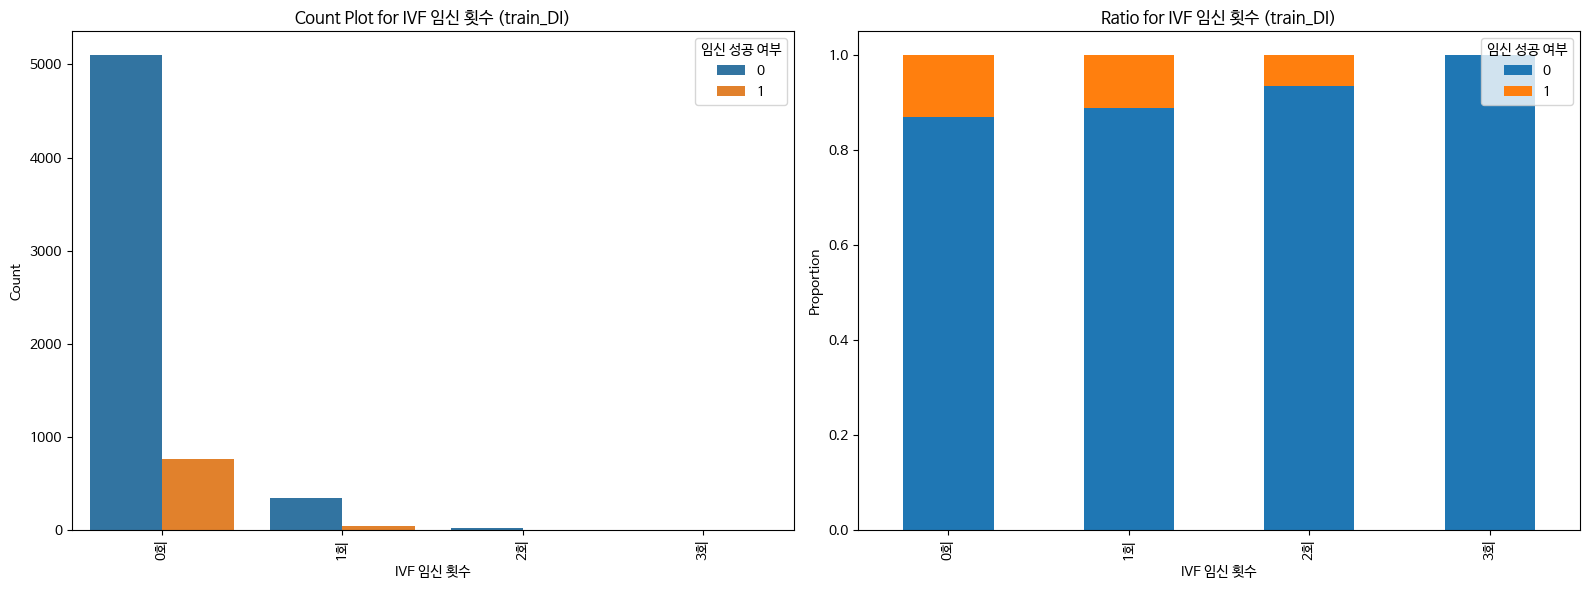

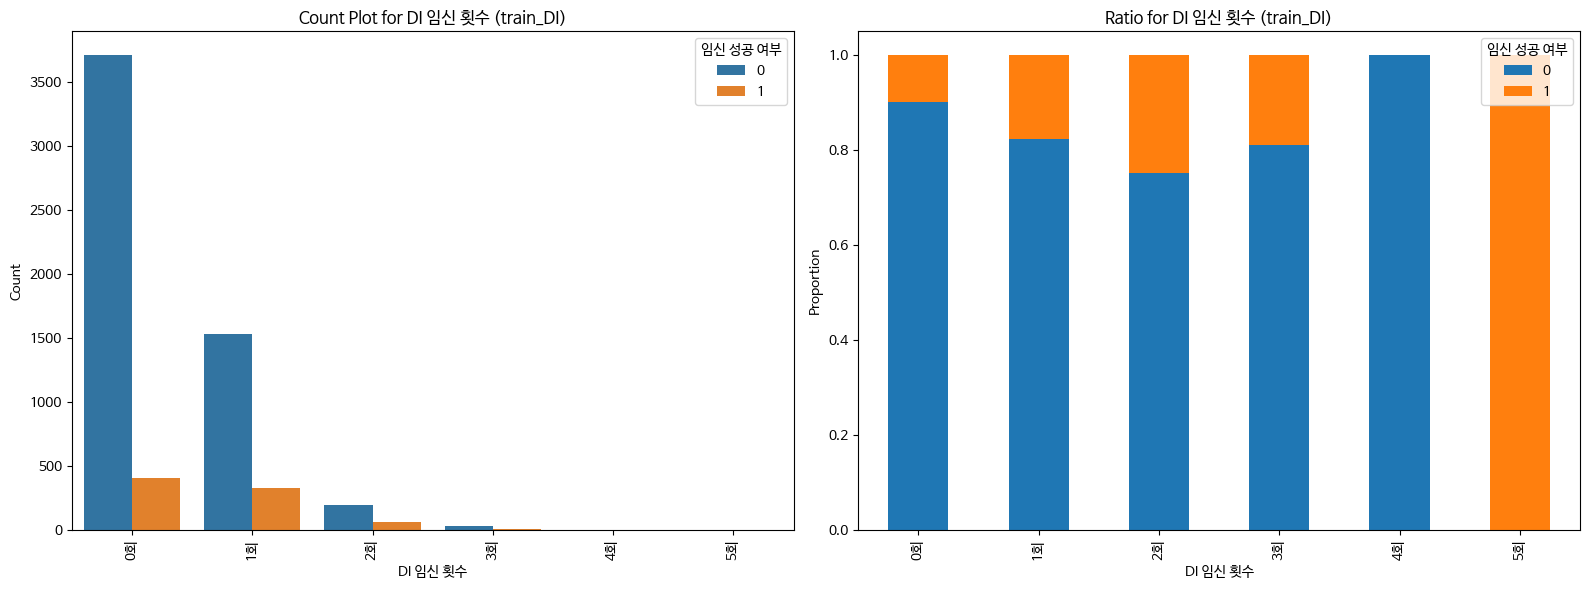

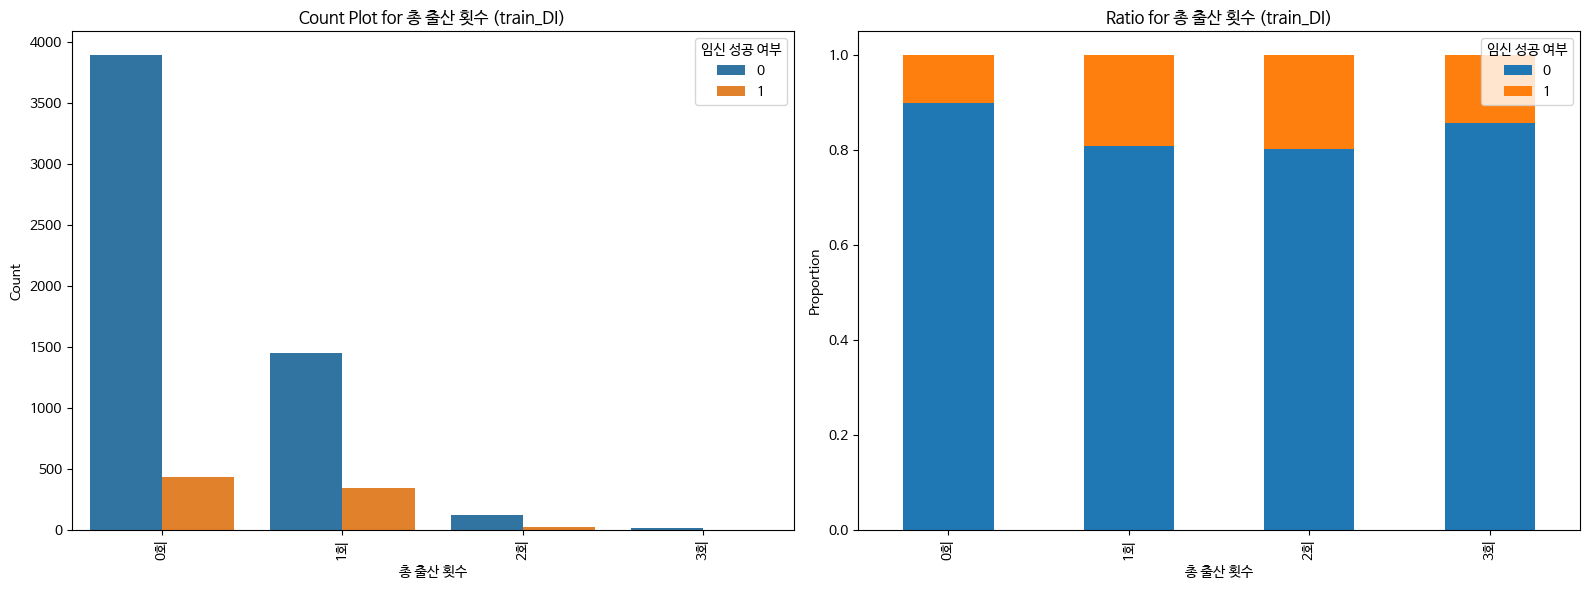

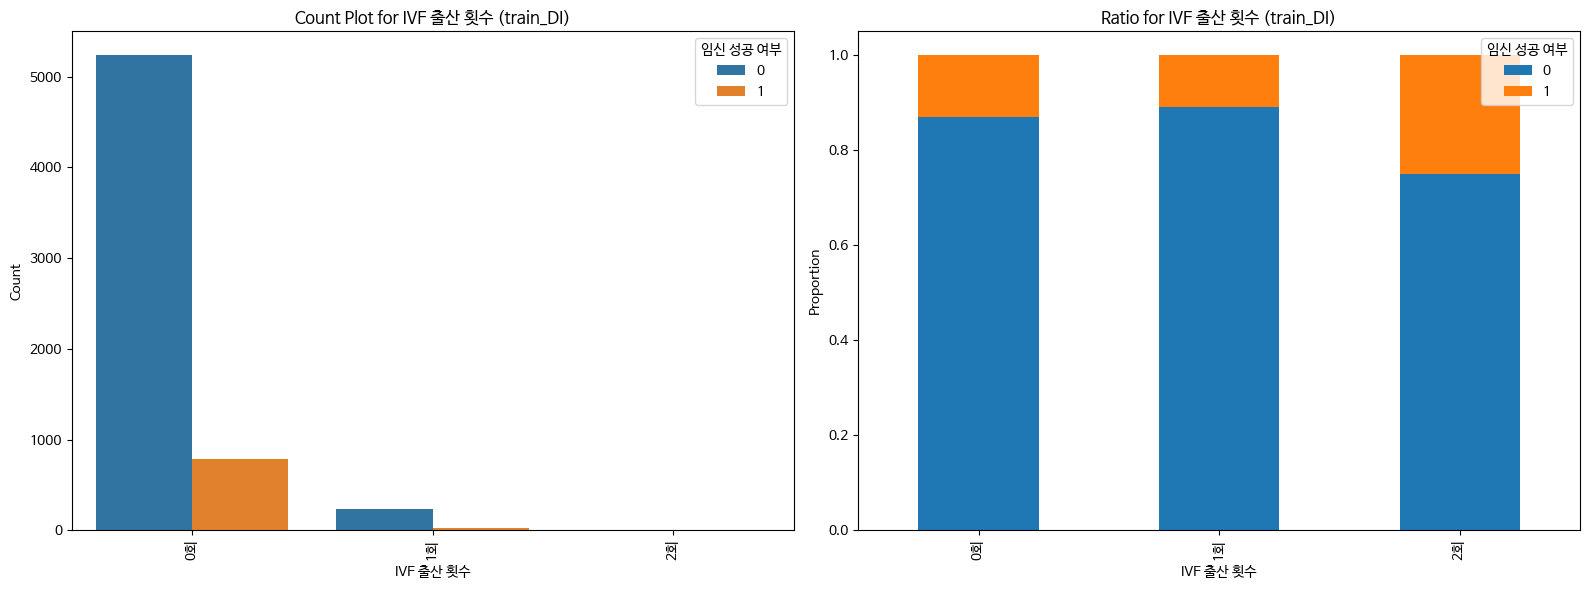

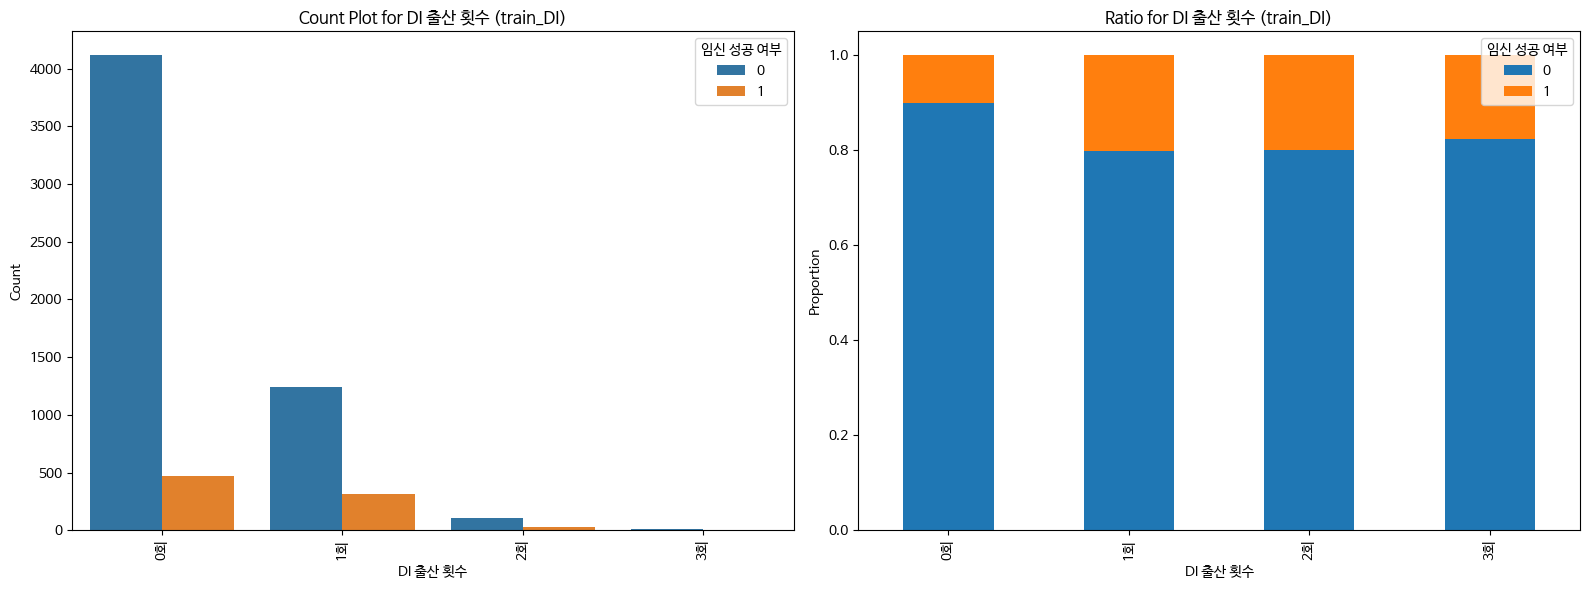

### train_IVF 데이터 시각화 ###


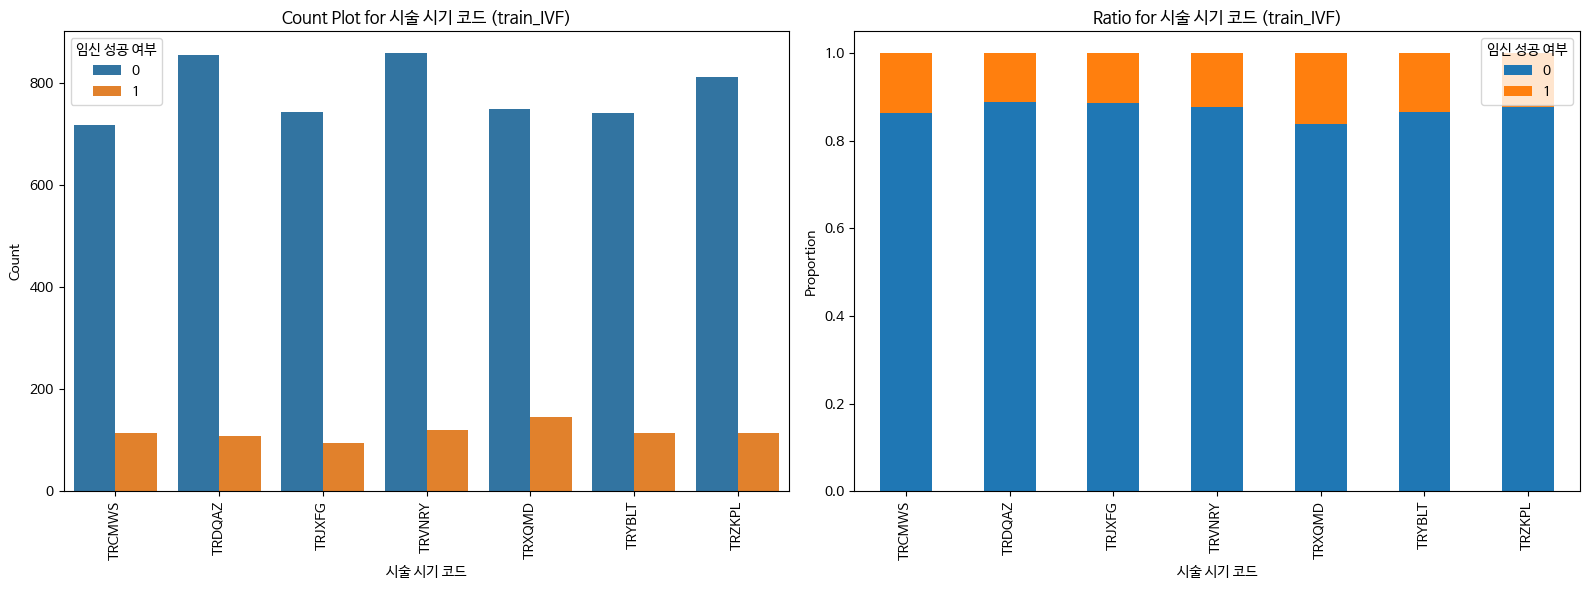

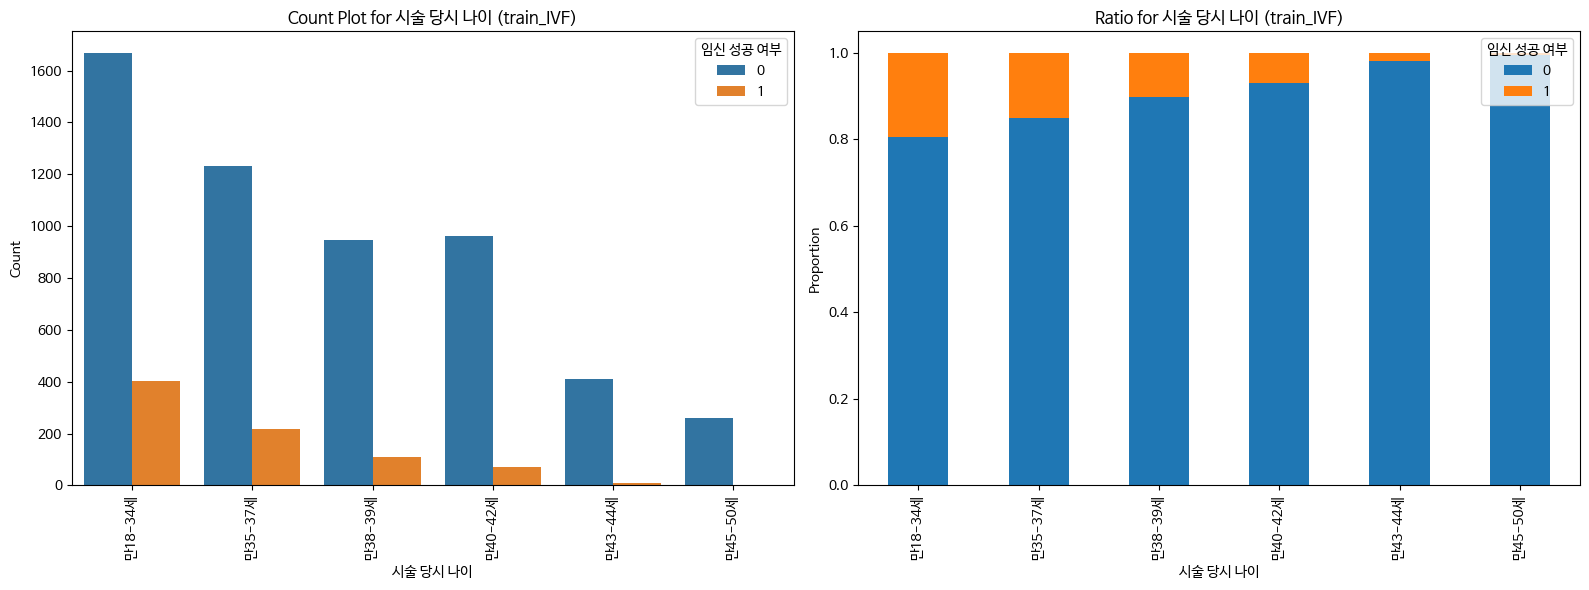

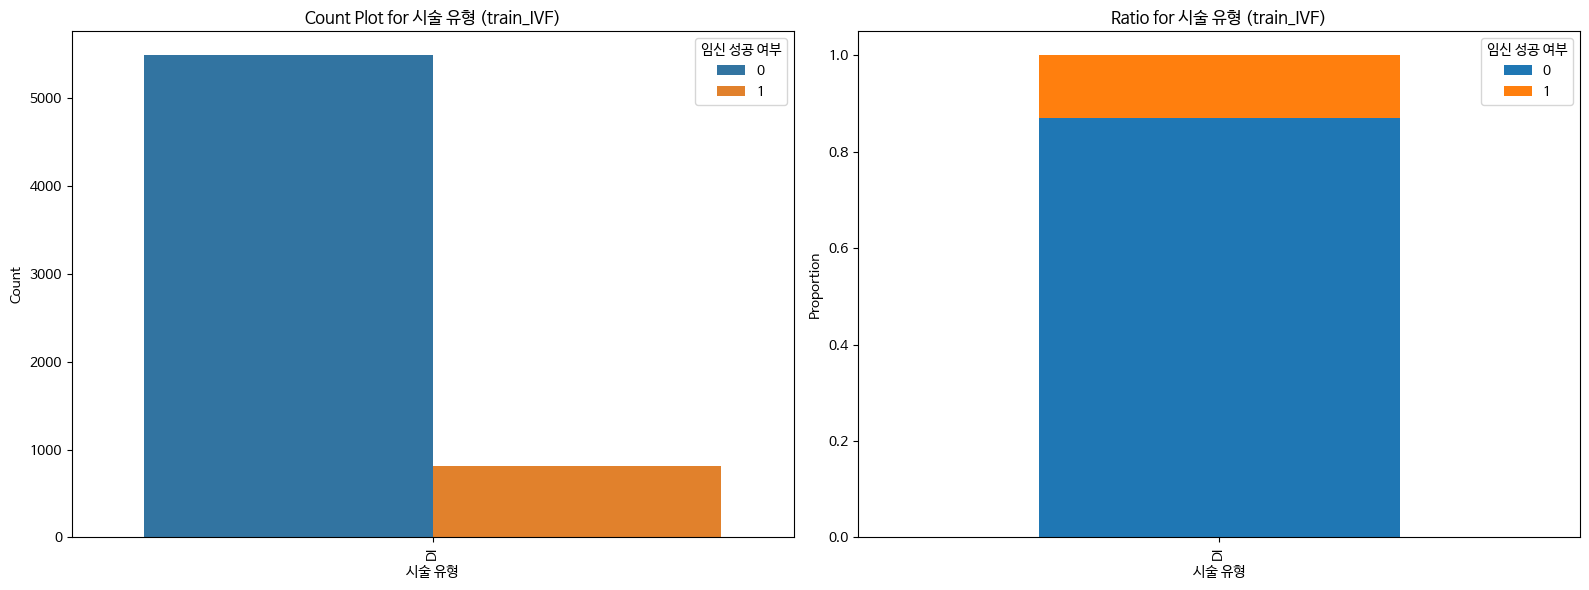

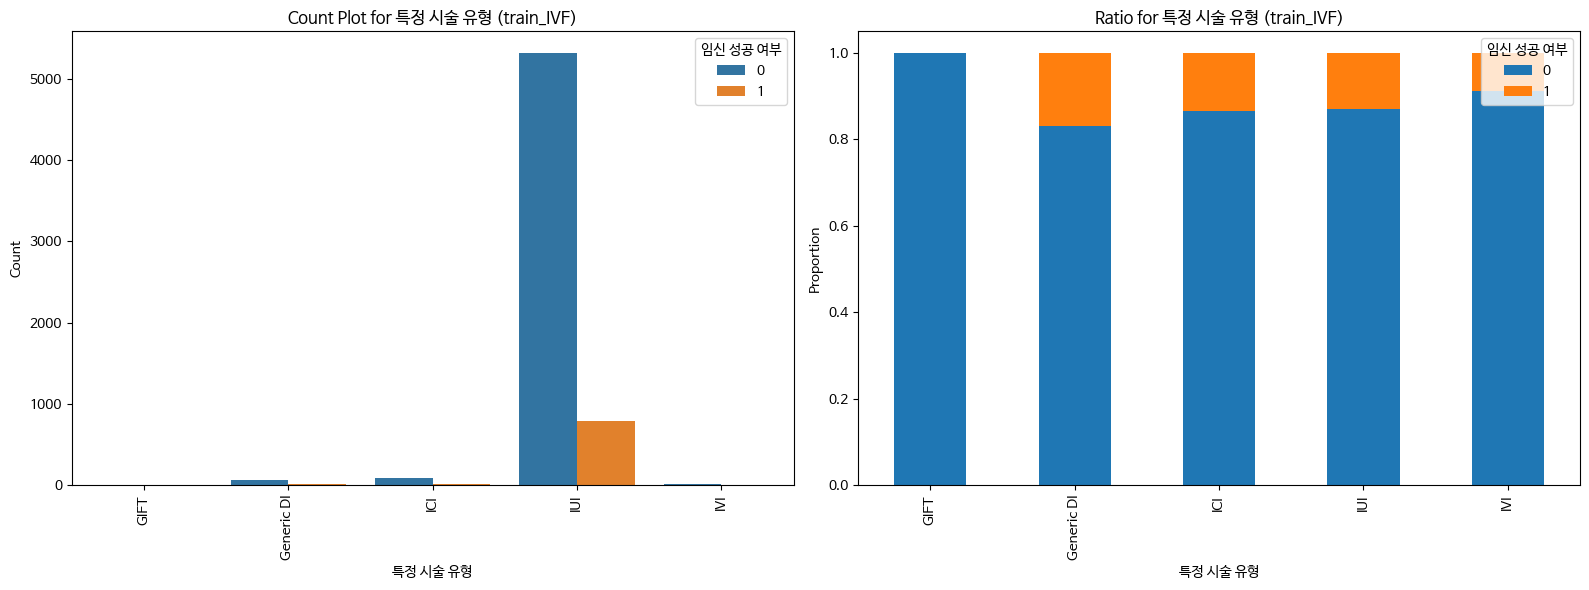

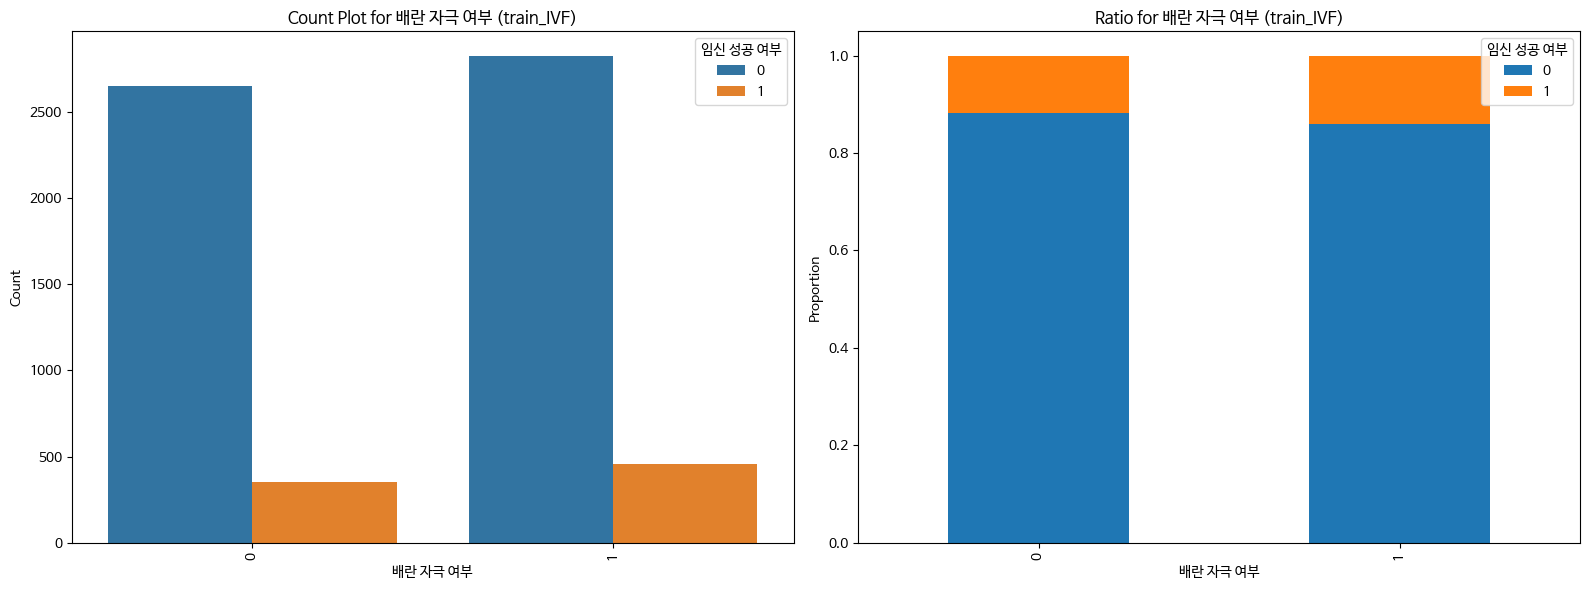

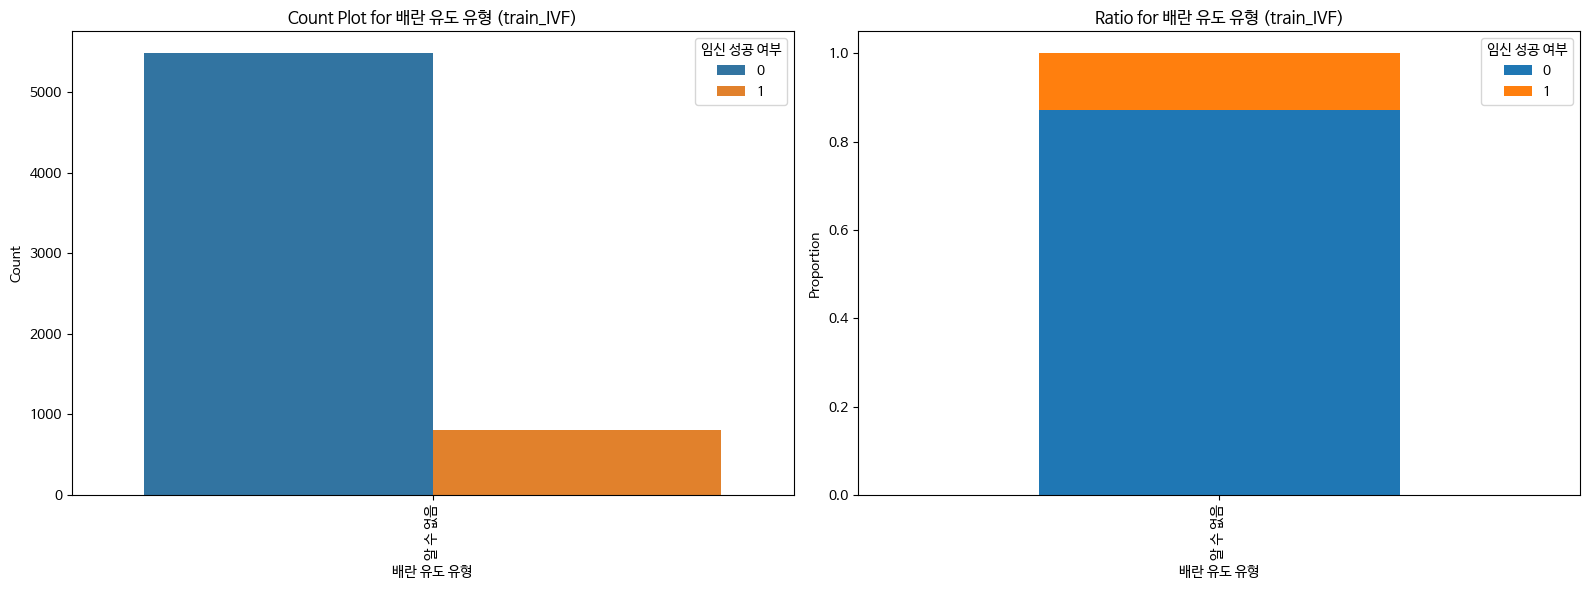

단일 배아 이식 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
착상 전 유전 검사 사용 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
착상 전 유전 진단 사용 여부 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.
배아 생성 주요 이유 컬럼에서 임신 성공 여부 값이 하나만 존재하여 시각화를 건너뜁니다.


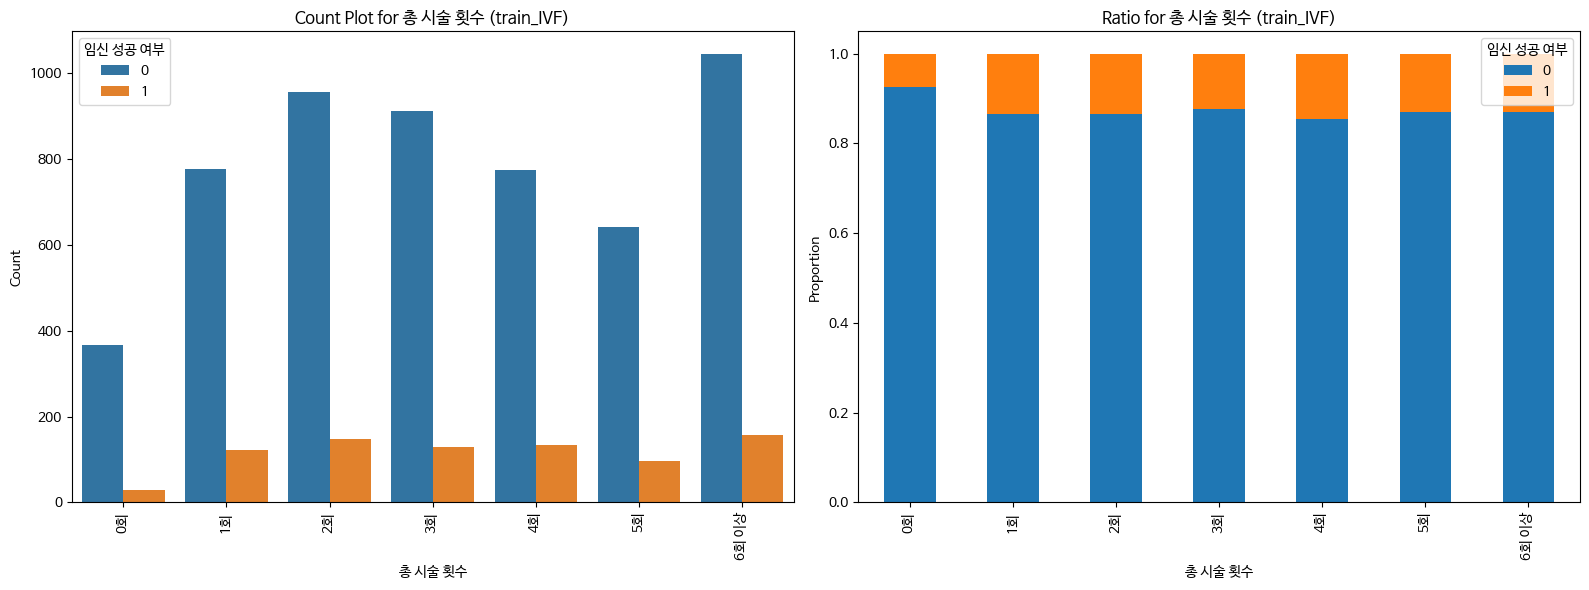

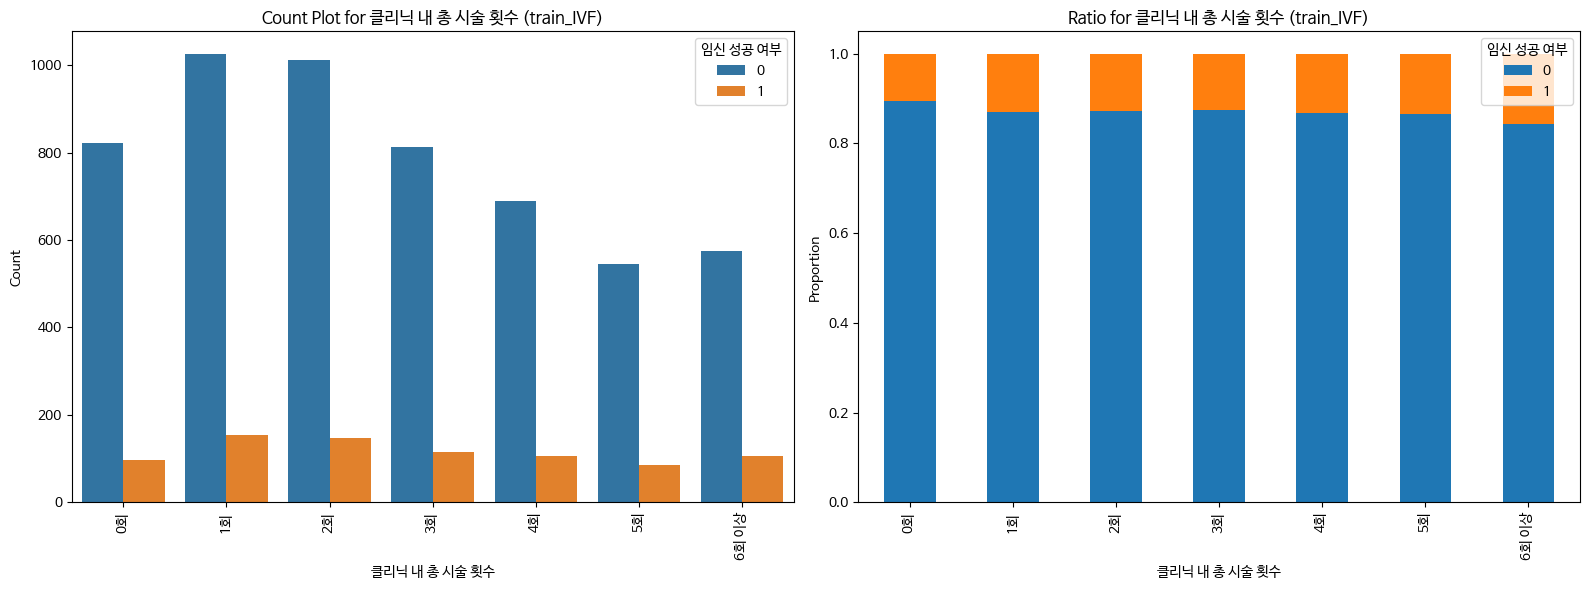

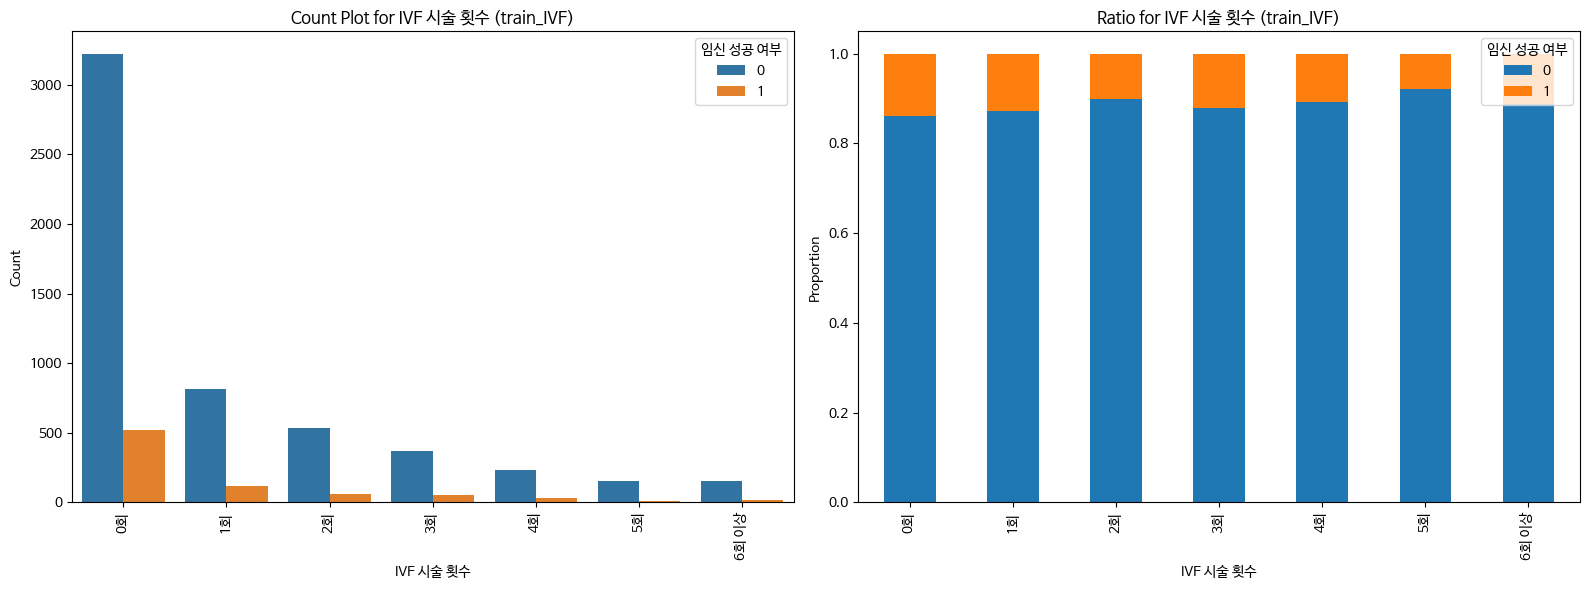

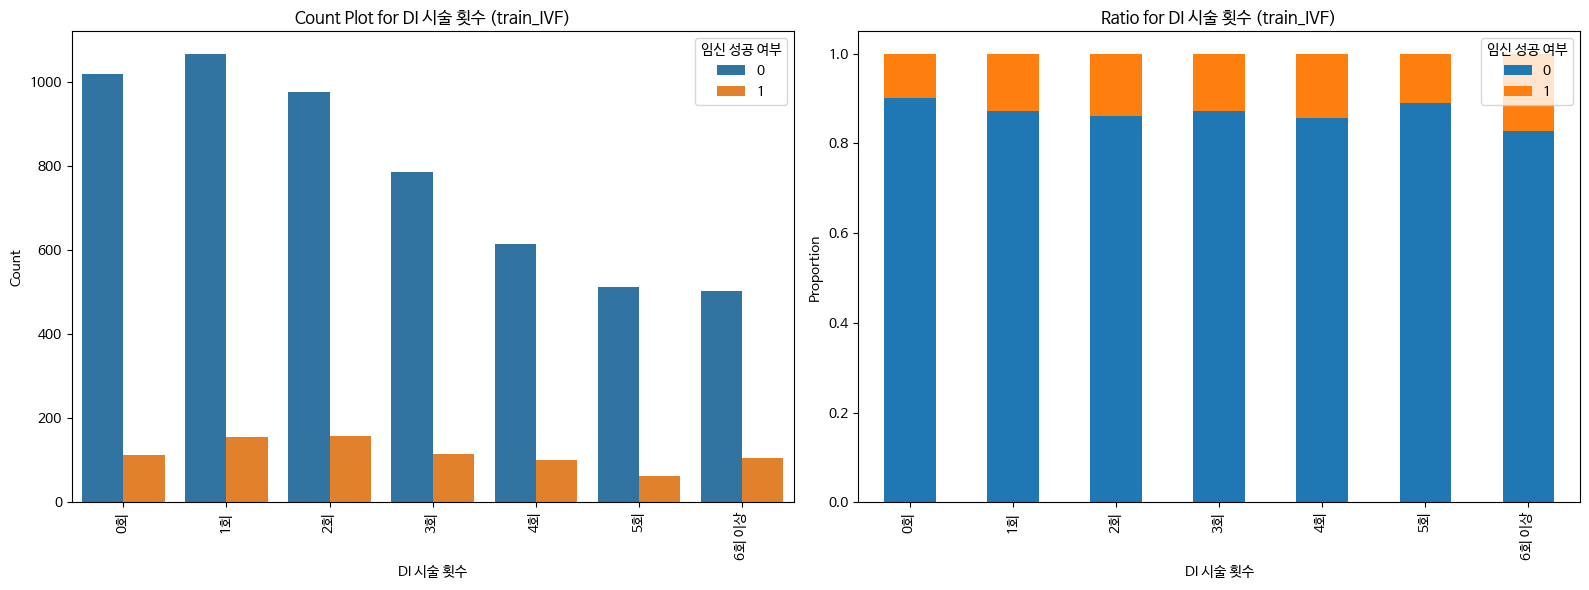

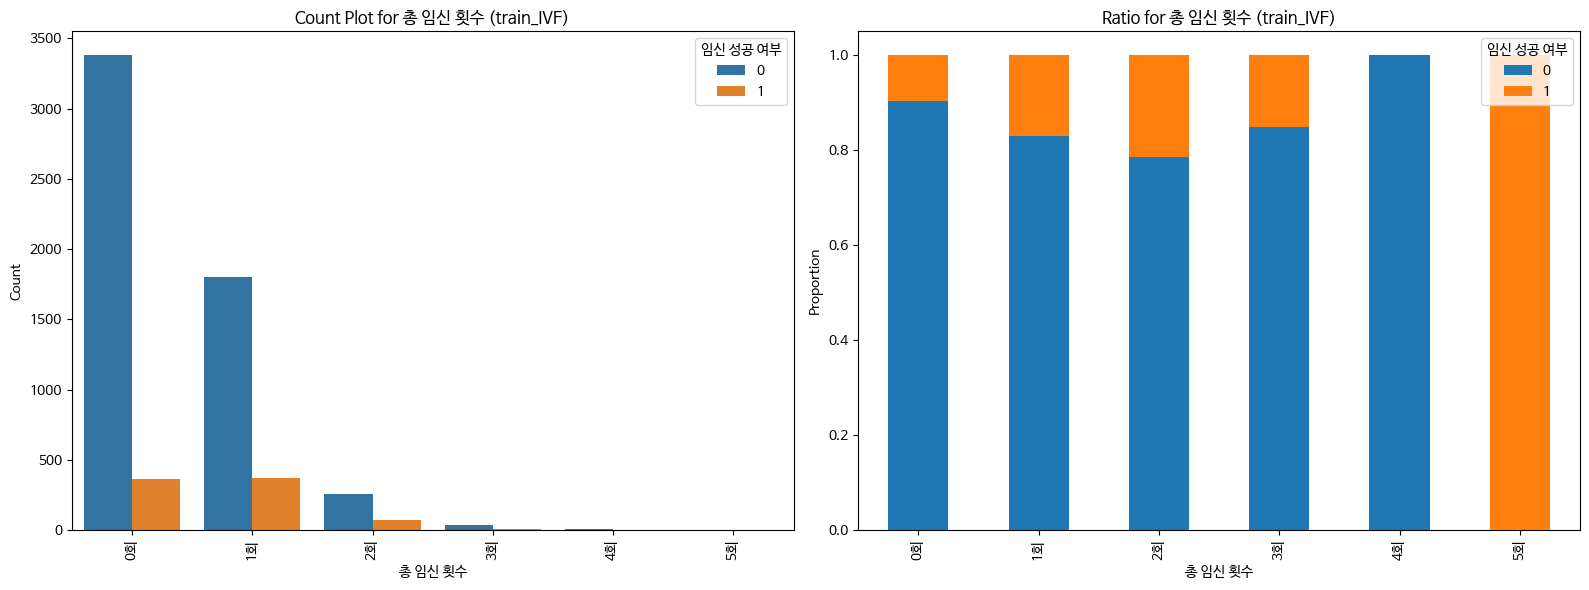

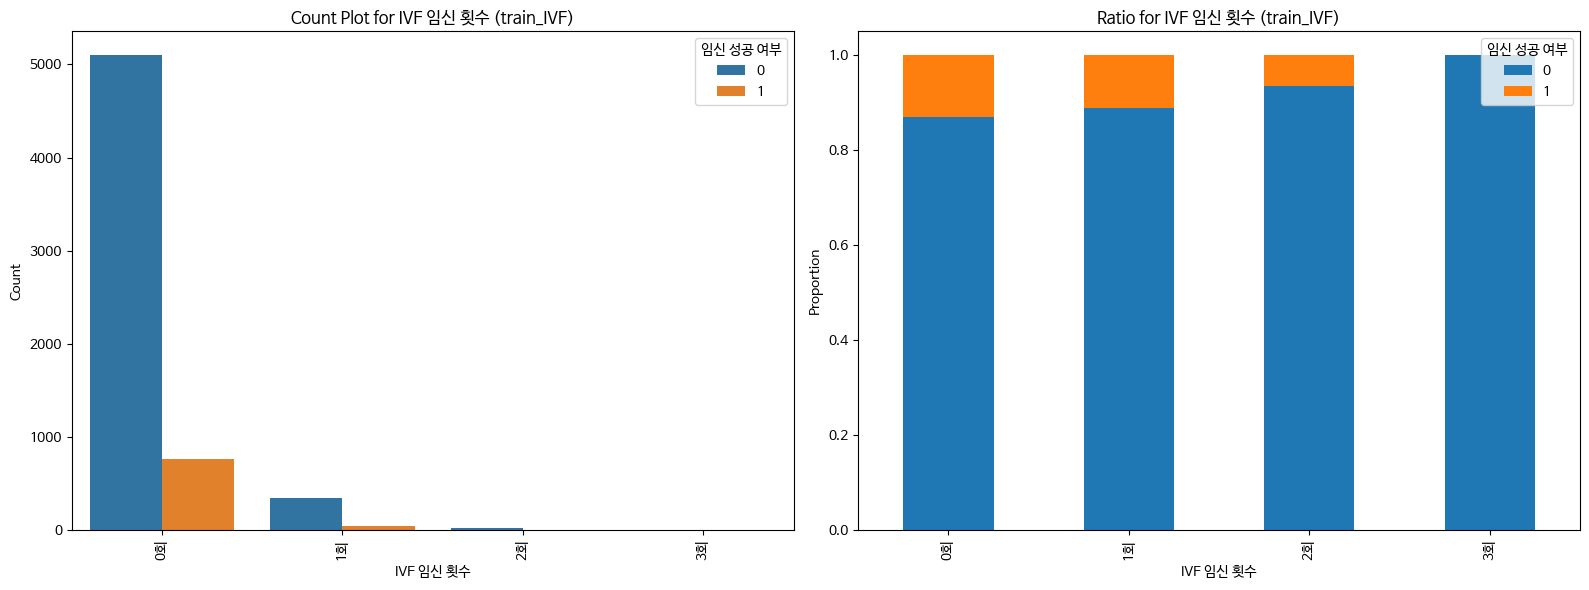

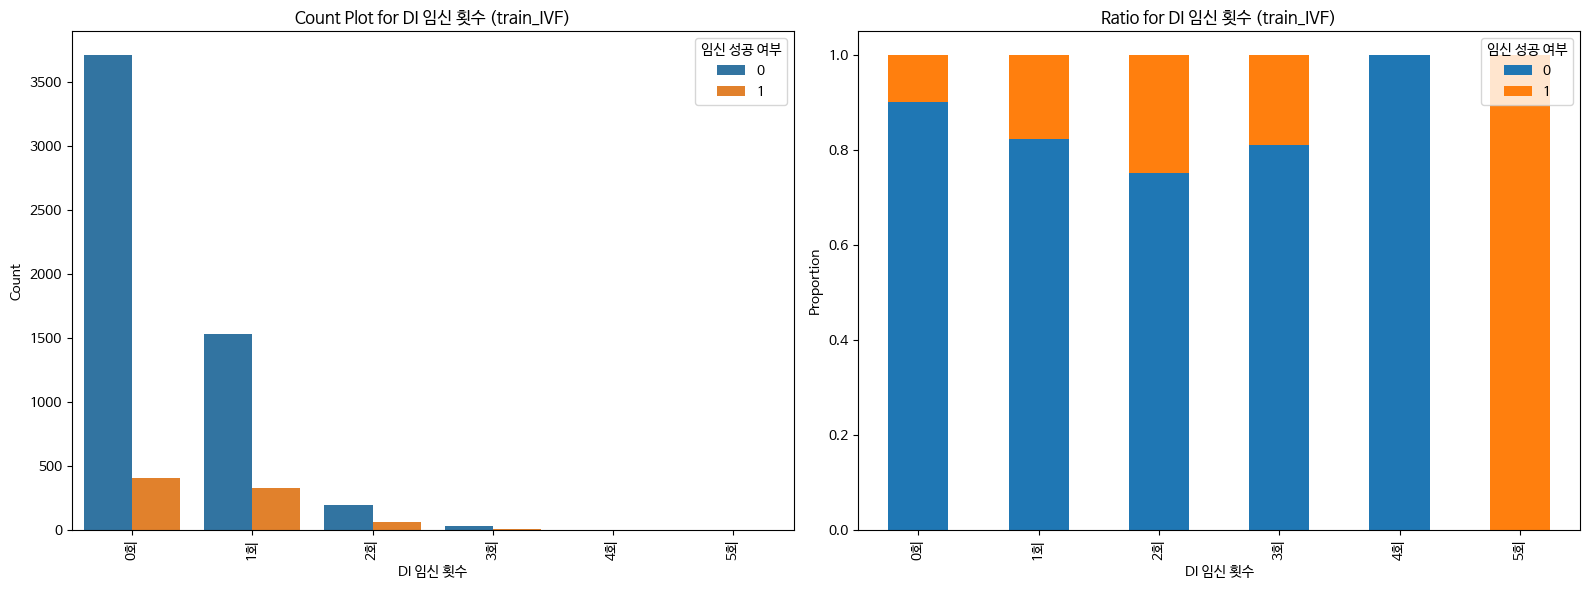

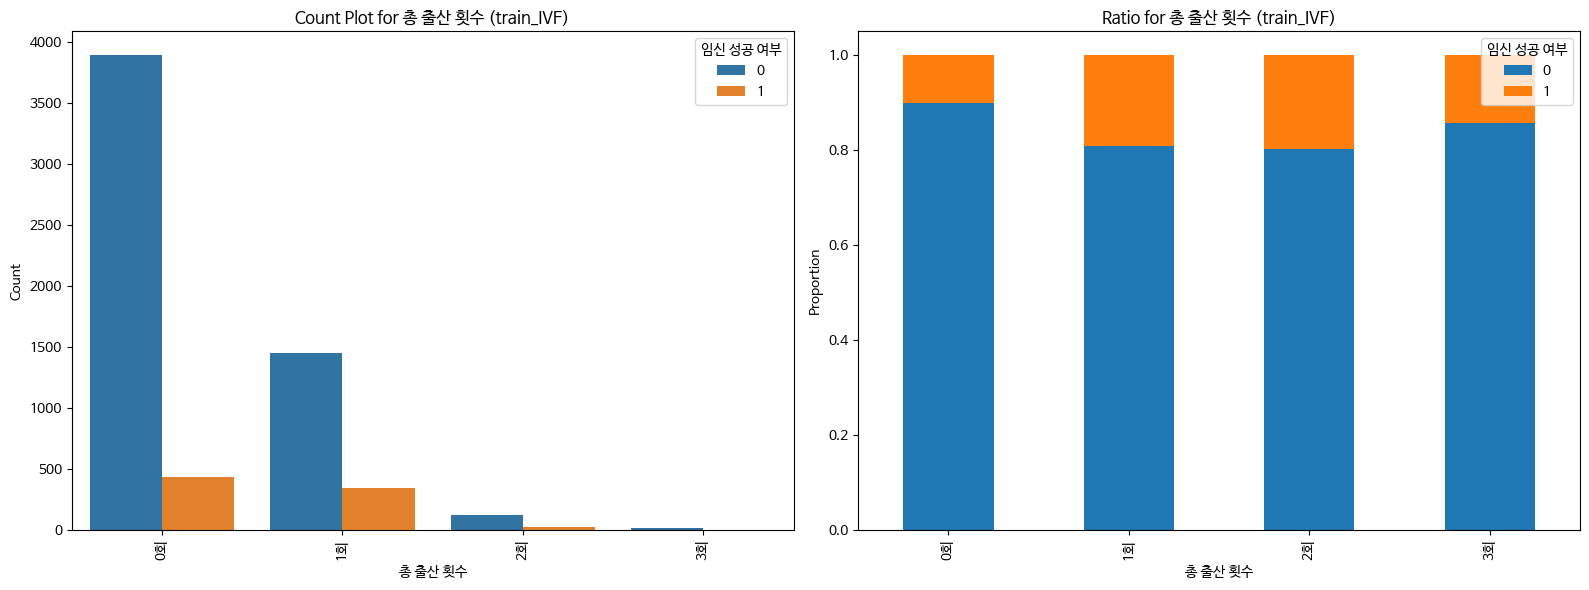

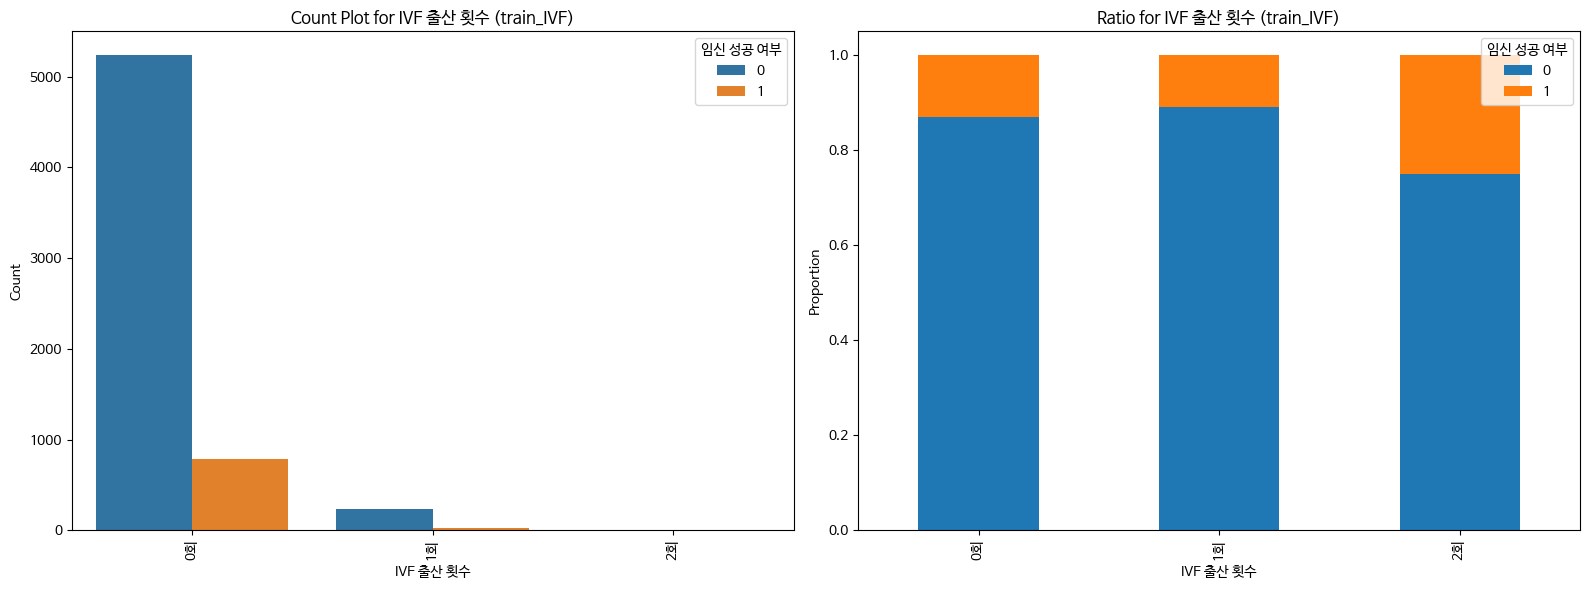

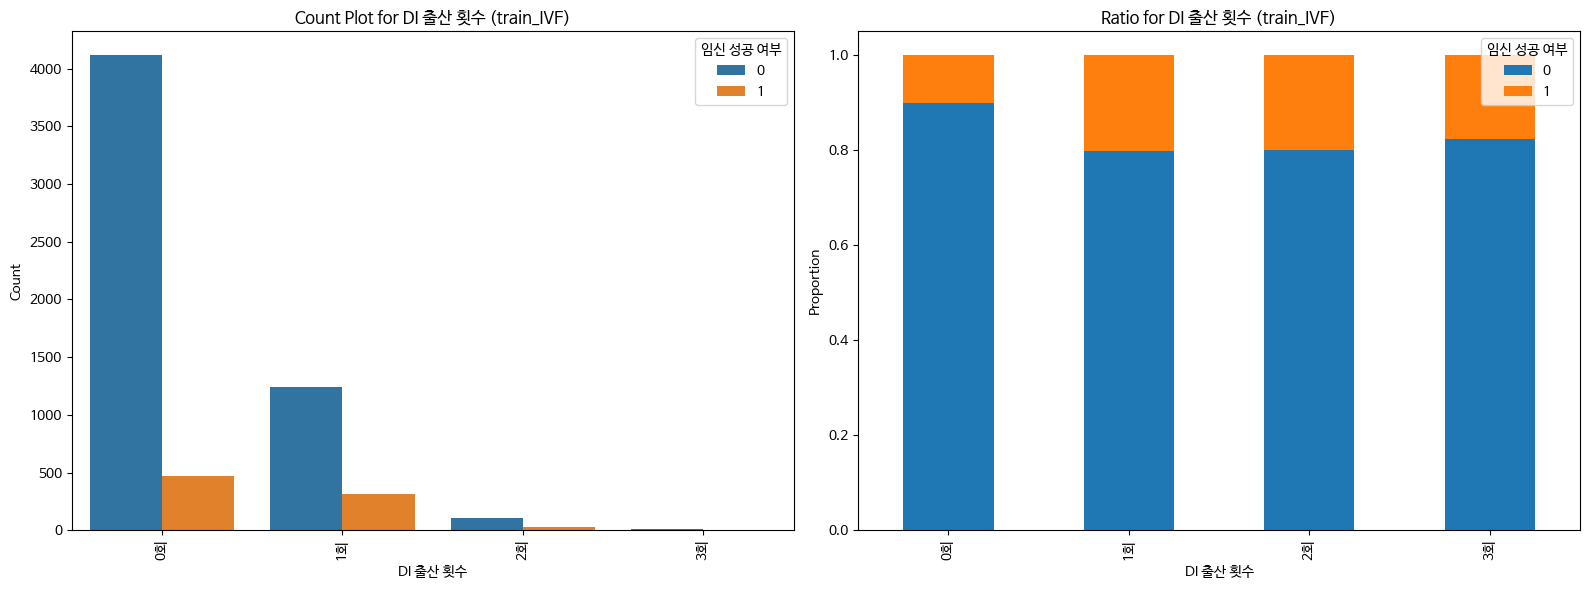

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화에 사용할 범주형 컬럼 리스트
categorical_columns = [
    "시술 시기 코드", "시술 당시 나이", "시술 유형", "특정 시술 유형",
    "배란 자극 여부", "배란 유도 유형", "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "총 시술 횟수", "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

TARGET = "임신 성공 여부"

# 데이터셋 목록
datasets = {
    "train_DI": train_DI,
    "train_IVF": train_IVF
}

# 시각화 수행
for dataset_name, train in datasets.items():
    print(f"### {dataset_name} 데이터 시각화 ###")

    for cat_col in categorical_columns:
        if cat_col not in train.columns:
            print(f"컬럼 {cat_col}이(가) {dataset_name} 데이터에 존재하지 않습니다.")
            continue

        # TARGET 컬럼 확인
        if TARGET not in train.columns:
            print(f"TARGET 컬럼 '{TARGET}'이(가) {dataset_name} 데이터에 존재하지 않습니다.")
            continue

        # 범주별 TARGET 빈도 계산
        grouped = train.groupby(cat_col)[TARGET].value_counts().unstack(fill_value=0)

        # unstack 후 데이터가 2차원이 아닐 경우 건너뛰기
        if grouped.shape[1] < 2:
            print(f"{cat_col} 컬럼에서 {TARGET} 값이 하나만 존재하여 시각화를 건너뜁니다.")
            continue

        # x축 순서 지정
        order = grouped.index.tolist()

        # 하나의 figure에 1행 2열의 subplot 생성
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # 왼쪽 subplot: Count Plot
        sns.countplot(x=cat_col, hue=TARGET, data=train, ax=axes[0], order=order)
        axes[0].set_title(f"Count Plot for {cat_col} ({dataset_name})")
        axes[0].set_xlabel(cat_col)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis='x', rotation=90)

        # 오른쪽 subplot: Stacked Bar Plot (각 범주별 TARGET 비율)
        percentages = grouped.div(grouped.sum(axis=1), axis=0)

        # 스택형 막대 그래프 출력
        percentages.plot(kind='bar', stacked=True, ax=axes[1])
        axes[1].set_title(f"Ratio for {cat_col} ({dataset_name})")
        axes[1].set_xlabel(cat_col)
        axes[1].set_ylabel("Proportion")
        axes[1].tick_params(axis='x', rotation=90)
        axes[1].legend(title=TARGET, loc='upper right')

        plt.tight_layout()
        plt.show()


In [ ]:
# 임신 성공 여부(TARGET)와 각 범주형 변수의 관계 분석
import numpy as np

# 결과 저장용 데이터프레임 생성
success_rates = []

for dataset_name, train in {"train_DI": train_DI, "train_IVF": train_IVF}.items():
    for cat_col in categorical_columns:
        if cat_col in train.columns and TARGET in train.columns:
            # 각 범주별 임신 성공률 계산
            grouped = train.groupby(cat_col)[TARGET].mean()
            # 최대/최소 성공률 및 차이 계산
            max_success = grouped.max()
            min_success = grouped.min()
            diff = max_success - min_success

            success_rates.append({
                "Dataset": dataset_name,
                "Feature": cat_col,
                "Max Success Rate": max_success,
                "Min Success Rate": min_success,
                "Difference": diff
            })

# 데이터프레임 변환 후 성공률 차이가 큰 순서대로 정렬
success_rates_df = pd.DataFrame(success_rates).sort_values(by="Difference", ascending=False)

# 결과 표시
print("### 임신 성공률이 큰 차이를 보이는 변수 ###")
print(success_rates_df)


### 임신 성공률이 큰 차이를 보이는 변수 ###
      Dataset           Feature  Max Success Rate  Min Success Rate  \
16   train_DI          DI 임신 횟수          1.000000          0.000000   
34  train_IVF           총 임신 횟수          1.000000          0.000000   
36  train_IVF          DI 임신 횟수          1.000000          0.000000   
14   train_DI           총 임신 횟수          1.000000          0.000000   
21  train_IVF          시술 당시 나이          0.194592          0.003817   
1    train_DI          시술 당시 나이          0.194592          0.003817   
3    train_DI          특정 시술 유형          0.169014          0.000000   
23  train_IVF          특정 시술 유형          0.169014          0.000000   
18   train_DI         IVF 출산 횟수          0.250000          0.109434   
38  train_IVF         IVF 출산 횟수          0.250000          0.109434   
35  train_IVF         IVF 임신 횟수          0.130435          0.000000   
15   train_DI         IVF 임신 횟수          0.130435          0.000000   
19   train_DI          DI 출산 횟수          0.20244

In [ ]:
# 배아 관련 변수 목록
embryo_related_columns = [
    "이식된 배아 수", "배아 이식 경과일", "저장된 배아 수", "총 생성 배아 수",
    "혼합된 난자 수", "단일 배아 이식 여부", "미세주입 배아 이식 수",
    "미세주입 후 저장된 배아 수", "수집된 신선 난자 수", "미세주입에서 생성된 배아 수"
]

# 범주형 변수 목록 (특정 시술 유형, 나이, 출산 횟수 등 포함)
categorical_columns = [
    "특정 시술 유형", "시술 당시 나이", "총 출산 횟수"
]

# 목표 변수 (TARGET)
target_column = "임신 성공 여부"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# IVF 데이터셋 사용
data = train_IVF.copy()

# 배아 관련 변수를 포함한 데이터셋
X_with_embryo = data.drop(columns=[target_column]).select_dtypes(include=[np.number])
y = data[target_column]

# 배아 관련 변수를 제외한 데이터셋
X_without_embryo = X_with_embryo.drop(columns=embryo_related_columns, errors='ignore')

# 데이터 분할
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_embryo, y, test_size=0.2, random_state=42, stratify=y)
X_train_without, X_test_without, _, _ = train_test_split(X_without_embryo, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest 모델 학습
rf_with = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_without = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

rf_with.fit(X_train_with, y_train)
rf_without.fit(X_train_without, y_train)

# 모델 예측 및 정확도 비교
y_pred_with = rf_with.predict(X_test_with)
y_pred_without = rf_without.predict(X_test_without)

accuracy_with = accuracy_score(y_test, y_pred_with)
accuracy_without = accuracy_score(y_test, y_pred_without)

print(f"\n✅ 배아 관련 변수를 포함한 모델 정확도: {accuracy_with:.4f}")
print(f"✅ 배아 관련 변수를 제외한 모델 정확도: {accuracy_without:.4f}")



✅ 배아 관련 변수를 포함한 모델 정확도: 0.7385
✅ 배아 관련 변수를 제외한 모델 정확도: 0.7384


<ipython-input-35-82a15e348f80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_with.values[:10], y=feature_importance_with.index[:10], palette="Blues")


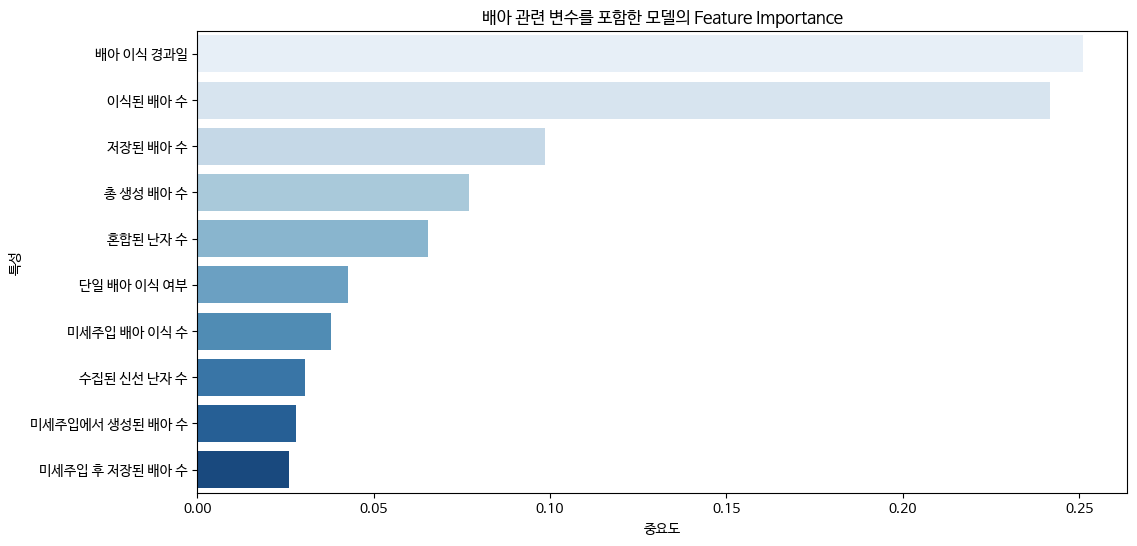

<ipython-input-35-82a15e348f80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_without.values[:10], y=feature_importance_without.index[:10], palette="Reds")


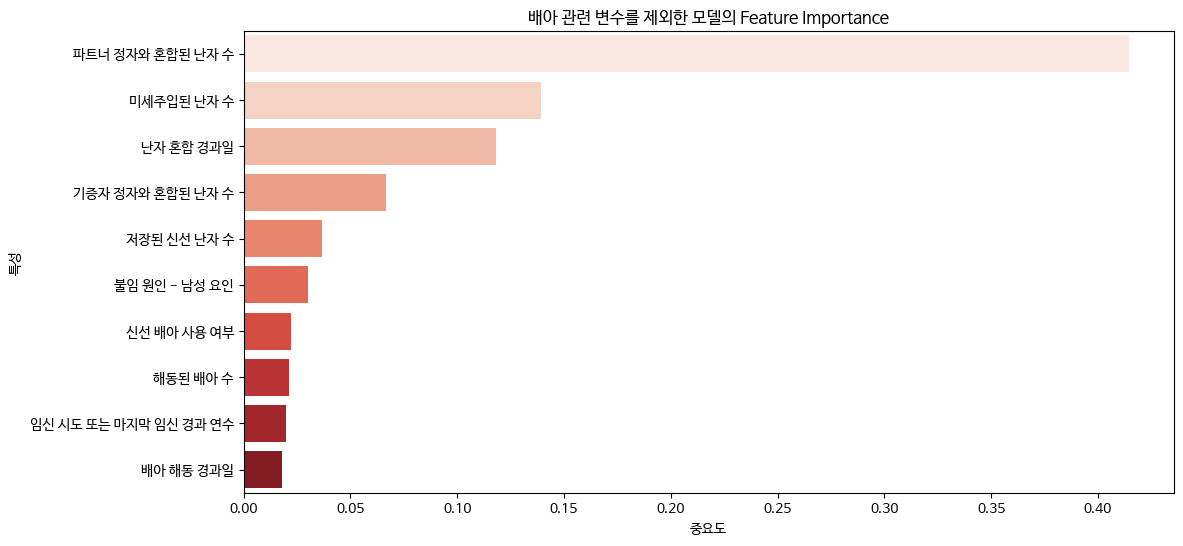

In [ ]:
# Feature Importance 추출
feature_importance_with = pd.Series(rf_with.feature_importances_, index=X_with_embryo.columns).sort_values(ascending=False)
feature_importance_without = pd.Series(rf_without.feature_importances_, index=X_without_embryo.columns).sort_values(ascending=False)

# Feature Importance 비교 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_with.values[:10], y=feature_importance_with.index[:10], palette="Blues")
plt.title("배아 관련 변수를 포함한 모델의 Feature Importance")
plt.xlabel("중요도")
plt.ylabel("특성")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_without.values[:10], y=feature_importance_without.index[:10], palette="Reds")
plt.title("배아 관련 변수를 제외한 모델의 Feature Importance")
plt.xlabel("중요도")
plt.ylabel("특성")
plt.show()



✅ `train_DI` 데이터의 Random Forest 모델 정확도: 0.8697


<ipython-input-36-479b15861984>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_DI.values[:10], y=feature_importance_DI.index[:10], palette="Oranges")


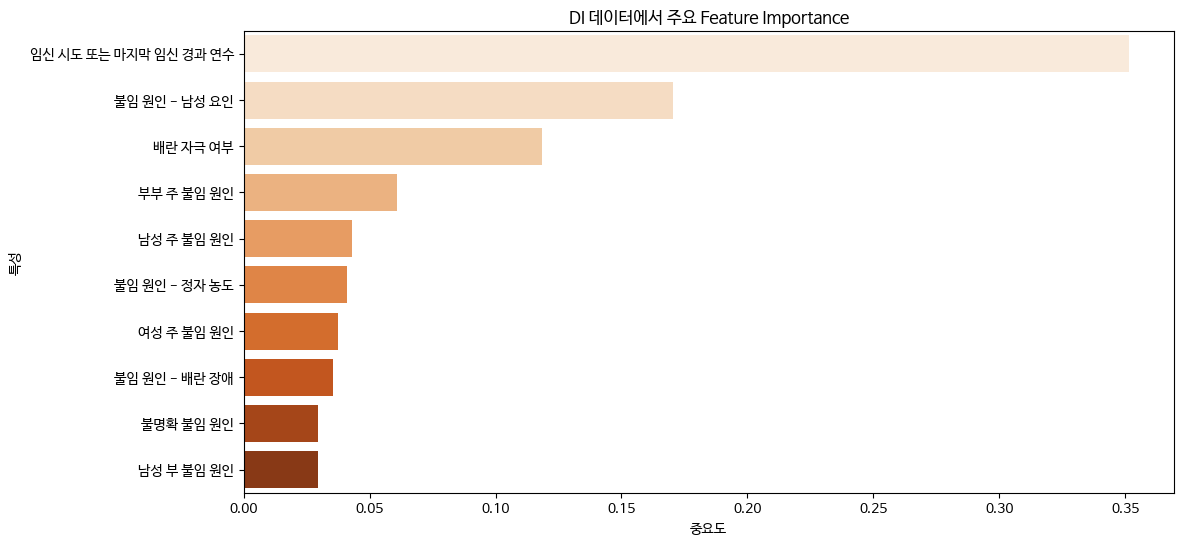

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# DI 데이터셋 사용
data_DI = train_DI.copy()

# 목표 변수 (임신 성공 여부)
target_column = "임신 성공 여부"

# 수치형 변수만 선택
X_DI = data_DI.drop(columns=[target_column]).select_dtypes(include=[np.number])
y_DI = data_DI[target_column]

# 데이터 분할
X_train_DI, X_test_DI, y_train_DI, y_test_DI = train_test_split(X_DI, y_DI, test_size=0.2, random_state=42, stratify=y_DI)

# Random Forest 모델 학습
rf_DI = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_DI.fit(X_train_DI, y_train_DI)

# 모델 예측 및 정확도 평가
y_pred_DI = rf_DI.predict(X_test_DI)
accuracy_DI = accuracy_score(y_test_DI, y_pred_DI)

print(f"\n✅ `train_DI` 데이터의 Random Forest 모델 정확도: {accuracy_DI:.4f}")

# Feature Importance 추출
feature_importance_DI = pd.Series(rf_DI.feature_importances_, index=X_DI.columns).sort_values(ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_DI.values[:10], y=feature_importance_DI.index[:10], palette="Oranges")
plt.title("DI 데이터에서 주요 Feature Importance")
plt.xlabel("중요도")
plt.ylabel("특성")
plt.show()


1 DI 임신 횟수, 총 임신 횟수, IVF 임신 횟수 등의 변수들은 임신 성공 여부를 예측하는 데 매우 중요한 변수일 가능성이 높음
2 나이, 특정 시술 유형, 출산 횟수 등도 임신 성공률과 밀접한 관련이 있음
3 배란 관련 변수들은 영향력이 적을 가능성이 높음 ->
**하지만 FEATURE IMPORTANCE 분석 결과에서는 배란 관련 변수가 더 중요**
- 배아 관련 변수는 임신 성공 여부 예측하는데 있어서 필수적인 요소로 보인다. (IVF에서는 반드시 포함)
- 배아 변수를 제외하면 난자 관련 변수가 중요 변수로 등장하지만, 배아 변수만큼 강한 영향력을 가지지는 않음


- DI시술에서 가장 중요한 변수는 '임신 시도 또는 마지막 임신 경과 일수'
- 불임 원인이 임신 성공 여부 결정하는 핵심 요소


IVF에서는 배아 상태가 핵심이었지만, DI에서는 불임 원인과 시술 전 임신 시도 기간이 더 중요하게 작용


🔹 train_IVF 데이터 분석 시작...

✅ train_IVF 모델 정확도: 0.7388
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     36929
           1       0.58      0.01      0.01     13083

    accuracy                           0.74     50012
   macro avg       0.66      0.50      0.43     50012
weighted avg       0.70      0.74      0.63     50012



<ipython-input-38-71f74d26ac33>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")


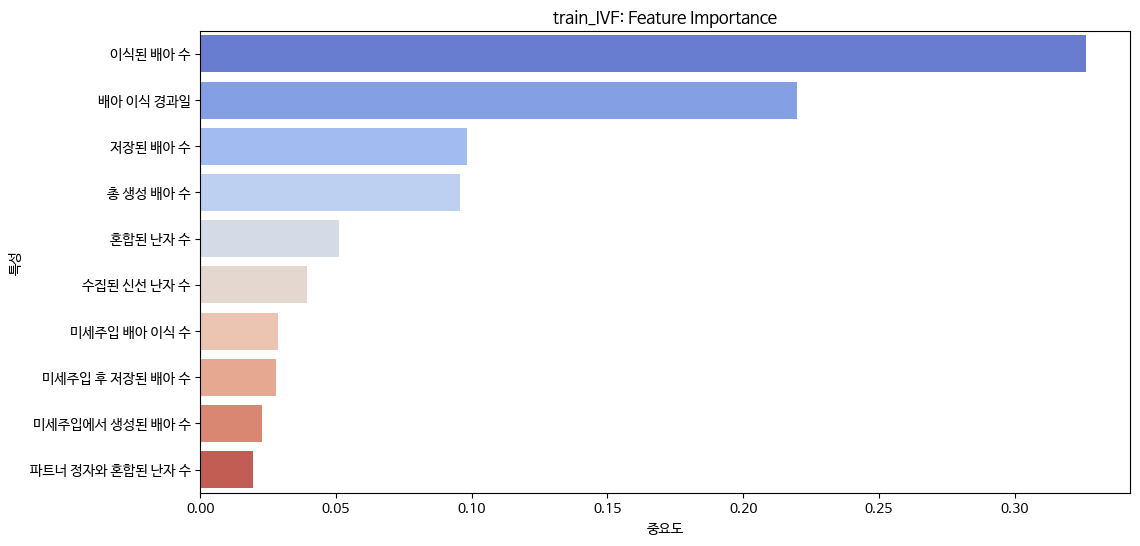


🔹 train_DI 데이터 분석 시작...

✅ train_DI 모델 정확도: 0.8705
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1097
           1       0.00      0.00      0.00       162

    accuracy                           0.87      1259
   macro avg       0.44      0.50      0.47      1259
weighted avg       0.76      0.87      0.81      1259



<ipython-input-38-71f74d26ac33>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")


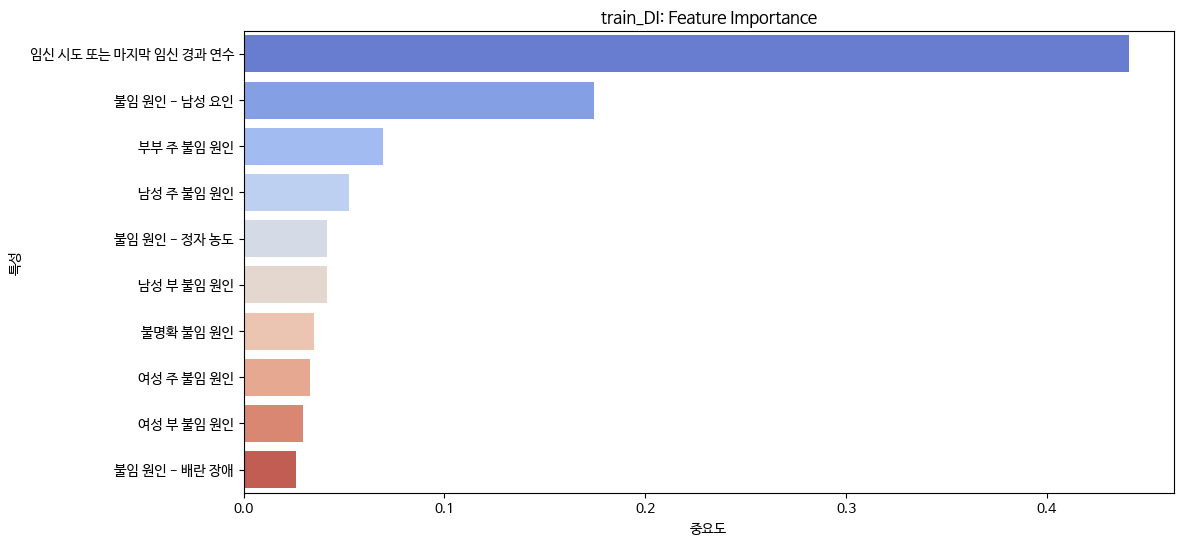

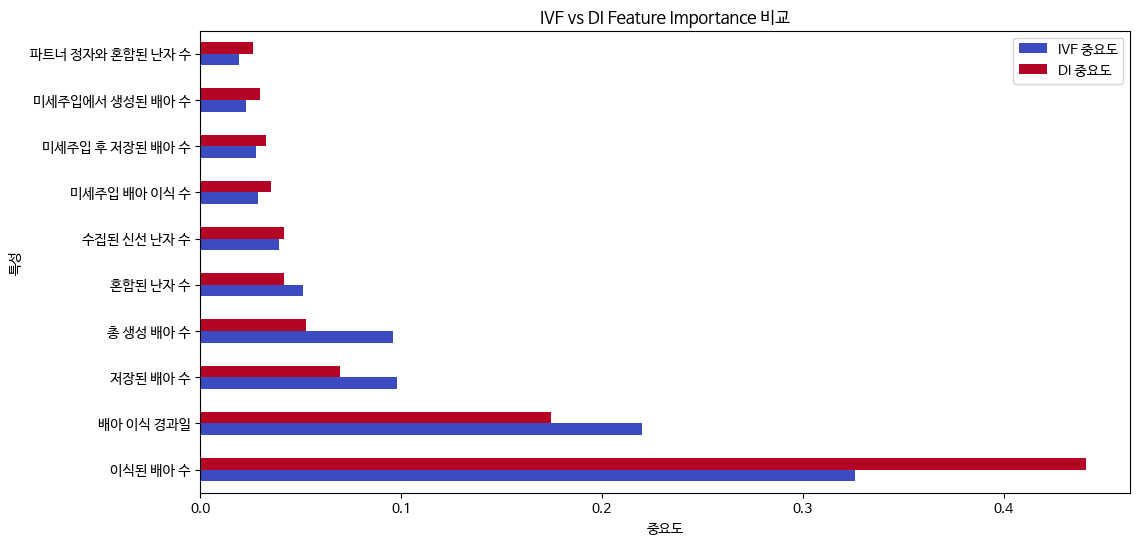

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🔹 데이터 전처리 함수 (결측치 처리, 형변환)
def preprocess_data(data):
    """데이터 전처리 (숫자형 변환, 결측치 처리)"""

    # 숫자로 변환할 수 있는 열 리스트
    numeric_cols = [
        "총 시술 횟수", "클리닉 내 총 시술 횟수", "IVF 시술 횟수", "DI 시술 횟수",
        "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수",
        "IVF 출산 횟수", "DI 출산 횟수", "시술 당시 나이", "임신 시도 또는 마지막 임신 경과 연수"
    ]

    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # 카테고리형 데이터를 문자열로 변환
    categorical_cols = [
        "시술 시기 코드", "시술 유형", "특정 시술 유형", "배란 자극 여부", "배란 유도 유형",
        "단일 배아 이식 여부", "착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "배아 생성 주요 이유"
    ]

    for col in categorical_cols:
        data[col] = data[col].astype(str)

    return data

# 🔹 Feature Importance 분석 함수 (RandomForest 사용)
def feature_importance_analysis(data, dataset_name):
    """Random Forest를 이용한 Feature Importance 분석"""

    target_column = "임신 성공 여부"

    X = data.drop(columns=[target_column]).select_dtypes(include=[np.number])
    y = data[target_column]

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 모델 학습
    rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n✅ {dataset_name} 모델 정확도: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Feature Importance 추출
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Feature Importance 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")
    plt.title(f"{dataset_name}: Feature Importance")
    plt.xlabel("중요도")
    plt.ylabel("특성")
    plt.show()

    return feature_importance  # 📌 Feature Importance 반환 추가

# 🔹 IVF vs DI 데이터 비교 시각화
def compare_ivf_di_feature_importance(ivf_importance, di_importance):
    """IVF와 DI 데이터에서 중요 변수를 비교"""

    comparison_df = pd.DataFrame({
        "IVF 중요도": ivf_importance[:10].values,
        "DI 중요도": di_importance[:10].values
    }, index=ivf_importance[:10].index)

    comparison_df.plot(kind="barh", figsize=(12, 6), colormap="coolwarm")
    plt.title("IVF vs DI Feature Importance 비교")
    plt.xlabel("중요도")
    plt.ylabel("특성")
    plt.show()

# 🔹 데이터셋 불러오기
train_IVF = pd.read_csv("train_IVF.csv")
train_DI = pd.read_csv("train_DI.csv")

datasets = {
    "train_IVF": train_IVF,
    "train_DI": train_DI,
}

# 🔹 전체 분석 실행
feature_importances = {}

for dataset_name, data in datasets.items():
    print(f"\n🔹 {dataset_name} 데이터 분석 시작...")

    # 데이터 전처리
    data = preprocess_data(data)

    # Feature Importance 분석 수행 후 저장
    feature_importances[dataset_name] = feature_importance_analysis(data, dataset_name)  # 📌 반환값 저장

# 🔹 IVF와 DI 데이터의 Feature Importance 비교
compare_ivf_di_feature_importance(feature_importances["train_IVF"], feature_importances["train_DI"])


In [ ]:
ivf_selected_columns = [
    "이식된 배아 수", "배아 이식 경과일", "저장된 배아 수", "총 생성 배아 수",
    "혼합된 난자 수", "단일 배아 이식 여부", "미세주입 배아 이식 수",
    "미세주입 후 저장된 배아 수", "수집된 신선 난자 수", "미세주입에서 생성된 배아 수",
    "임신 성공 여부"
]
di_selected_columns = [
    "임신 시도 또는 마지막 임신 경과 연수", "불임 원인 - 남성 요인", "배란 자극 여부",
    "부부 주 불임 원인", "남성 주 불임 원인", "불임 원인 - 정자 농도",
    "여성 주 불임 원인", "불임 원인 - 배란 장애", "불명확 불임 원인",
    "남성 부 불임 원인", "임신 성공 여부"
]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


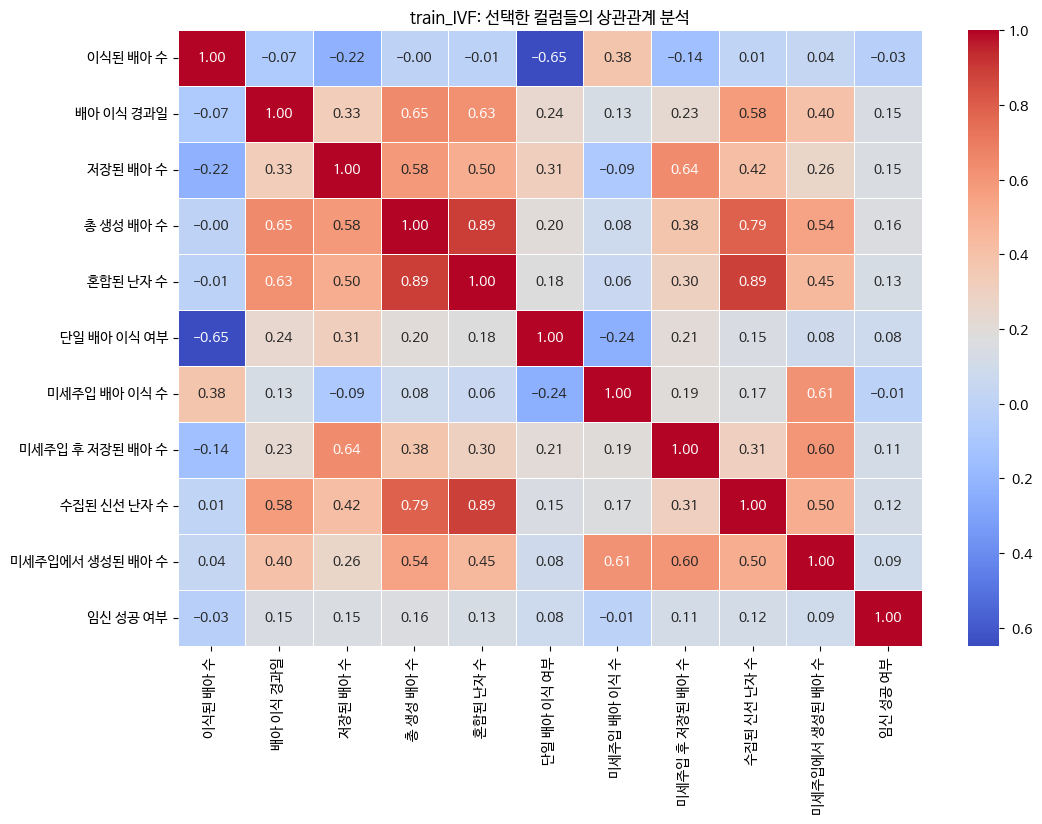

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


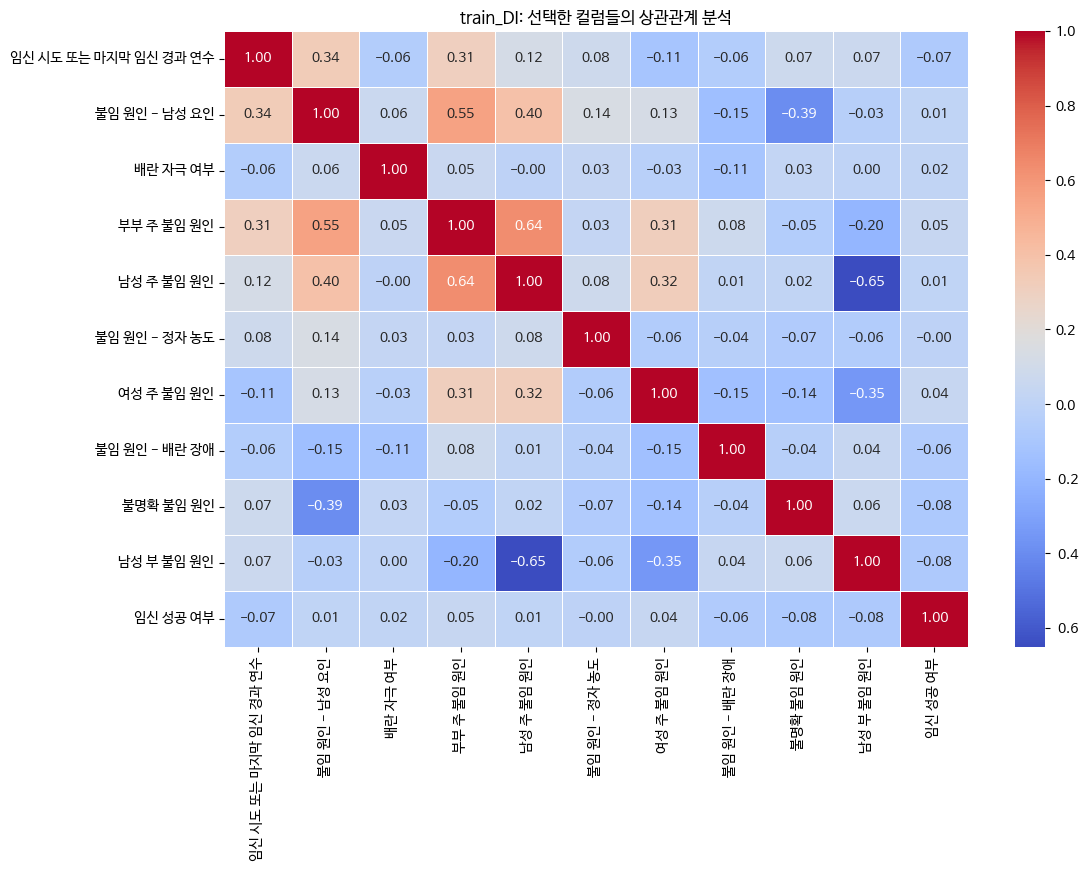

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 IVF 및 DI 데이터의 특정 컬럼만을 이용한 상관관계 분석 함수
def custom_correlation_analysis(data, dataset_name, selected_columns):
    """특정 컬럼만을 이용하여 상관관계 분석"""

    # 선택한 컬럼만 필터링
    selected_data = data[selected_columns].dropna()

    # 상관관계 행렬 계산
    correlation_matrix = selected_data.corr()

    # 상관관계 Heatmap 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"{dataset_name}: 선택한 컬럼들의 상관관계 분석")
    plt.show()

# 🔹 데이터셋 불러오기
train_IVF = pd.read_csv("train_IVF.csv")  # IVF 데이터
train_DI = pd.read_csv("train_DI.csv")    # DI 데이터

# 🔹 IVF 데이터에서 지정한 컬럼들로 상관관계 분석 실행
custom_correlation_analysis(train_IVF, "train_IVF", [
    "이식된 배아 수", "배아 이식 경과일", "저장된 배아 수", "총 생성 배아 수",
    "혼합된 난자 수", "단일 배아 이식 여부", "미세주입 배아 이식 수",
    "미세주입 후 저장된 배아 수", "수집된 신선 난자 수", "미세주입에서 생성된 배아 수",
    "임신 성공 여부"
])

# 🔹 DI 데이터에서 지정한 컬럼들로 상관관계 분석 실행
custom_correlation_analysis(train_DI, "train_DI", [
    "임신 시도 또는 마지막 임신 경과 연수", "불임 원인 - 남성 요인", "배란 자극 여부",
    "부부 주 불임 원인", "남성 주 불임 원인", "불임 원인 - 정자 농도",
    "여성 주 불임 원인", "불임 원인 - 배란 장애", "불명확 불임 원인",
    "남성 부 불임 원인", "임신 성공 여부"
])


- IVF에서는 배아 관련 변수가 가장 중요하며, 배아 이식 횟수와 보존 상태가 임신 성공 여부에 큰 영향을 미침
- DI에서는 불임 원인 및 배란 자극 여부가 핵심 변수로, 기존 임신 시도 기간이 성공 여부를 결정하는 중요한 요인임